**In this notebook all the algorithms will be fine-tuned and trained by integrating the CodeCarbon library which produces sustainability reports.**

**https://github.com/mlco2/codecarbon.git**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install codecarbon

In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 128.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

# Check if GPU is available
device_name = tf.test.gpu_device_name()
if device_name:
    print(f"GPU is active: {device_name}")
else:
    print("No GPU detected")


GPU is active: /device:GPU:0


In [ ]:
import os

save_path = '/content/drive/My Drive/codecarbon_summary'
os.makedirs(save_path, exist_ok=True)

In [3]:
# Import the Nilearn library
from nilearn import datasets
import nilearn.datasets
from nilearn.datasets import fetch_oasis_vbm
from nilearn.image import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Download and load Oasis “cross-sectional MRI” dataset (416 subjects).
# Gross outliers are removed and filtered by the data fetcher (DARTEL: 13 outliers).
# External variables are provided in a CSV file that is a copy of the original Oasis CSV file.

oasis_data=nilearn.datasets.fetch_oasis_vbm(n_subjects=None, dartel_version=True, data_dir=None, url=None, resume=True, verbose=1)


[fetch_oasis_vbm] Added README.md to /root/nilearn_data

[fetch_oasis_vbm] Dataset created in /root/nilearn_data/oasis1

[fetch_oasis_vbm] Downloading data from https://www.nitrc.org/frs/download.php/6364/archive_dartel.tgz ...

[fetch_oasis_vbm] Downloaded 450560 of 905208634 bytes (0.0%%, 34.5min remaining)

[fetch_oasis_vbm] Downloaded 9412608 of 905208634 bytes (1.0%%,  3.2min remaining)

[fetch_oasis_vbm] Downloaded 24248320 of 905208634 bytes (2.7%%,  1.9min remaining)

[fetch_oasis_vbm] Downloaded 38592512 of 905208634 bytes (4.3%%,  1.5min remaining)

[fetch_oasis_vbm] Downloaded 52994048 of 905208634 bytes (5.9%%,  1.4min remaining)

[fetch_oasis_vbm] Downloaded 68534272 of 905208634 bytes (7.6%%,  1.2min remaining)

[fetch_oasis_vbm] Downloaded 83607552 of 905208634 bytes (9.2%%,  1.2min remaining)

[fetch_oasis_vbm] Downloaded 98508800 of 905208634 bytes (10.9%%,  1.1min remaining)

[fetch_oasis_vbm] Downloaded 112893952 of 905208634 bytes (12.5%%,  1.1min remaining)

[fetch_oasis_vbm] Downloaded 127320064 of 905208634 bytes (14.1%%,  1.0min remaining)

[fetch_oasis_vbm] Downloaded 143163392 of 905208634 bytes (15.8%%,   59.2s remaining)

[fetch_oasis_vbm] Downloaded 158441472 of 905208634 bytes (17.5%%,   57.2s remaining)

[fetch_oasis_vbm] Downloaded 172859392 of 905208634 bytes (19.1%%,   55.7s remaining)

[fetch_oasis_vbm] Downloaded 187129856 of 905208634 bytes (20.7%%,   54.3s remaining)

[fetch_oasis_vbm] Downloaded 201637888 of 905208634 bytes (22.3%%,   52.9s remaining)

[fetch_oasis_vbm] Downloaded 217300992 of 905208634 bytes (24.0%%,   51.2s remaining)

[fetch_oasis_vbm] Downloaded 232759296 of 905208634 bytes (25.7%%,   49.6s remaining)

[fetch_oasis_vbm] Downloaded 247169024 of 905208634 bytes (27.3%%,   48.4s remaining)

[fetch_oasis_vbm] Downloaded 261521408 of 905208634 bytes (28.9%%,   47.2s remaining)

[fetch_oasis_vbm] Downloaded 275947520 of 905208634 bytes (30.5%%,   46.1s remaining)

[fetch_oasis_vbm] Downloaded 291618816 of 905208634 bytes (32.2%%,   44.6s remaining)

[fetch_oasis_vbm] Downloaded 307077120 of 905208634 bytes (33.9%%,   43.2s remaining)

[fetch_oasis_vbm] Downloaded 321486848 of 905208634 bytes (35.5%%,   42.1s remaining)

[fetch_oasis_vbm] Downloaded 335896576 of 905208634 bytes (37.1%%,   41.1s remaining)

[fetch_oasis_vbm] Downloaded 350396416 of 905208634 bytes (38.7%%,   39.9s remaining)

[fetch_oasis_vbm] Downloaded 365264896 of 905208634 bytes (40.4%%,   38.8s remaining)

[fetch_oasis_vbm] Downloaded 380338176 of 905208634 bytes (42.0%%,   37.6s remaining)

[fetch_oasis_vbm] Downloaded 395796480 of 905208634 bytes (43.7%%,   36.3s remaining)

[fetch_oasis_vbm] Downloaded 410337280 of 905208634 bytes (45.3%%,   35.3s remaining)

[fetch_oasis_vbm] Downloaded 424640512 of 905208634 bytes (46.9%%,   34.2s remaining)

[fetch_oasis_vbm] Downloaded 439042048 of 905208634 bytes (48.5%%,   33.2s remaining)

[fetch_oasis_vbm] Downloaded 454262784 of 905208634 bytes (50.2%%,   32.0s remaining)

[fetch_oasis_vbm] Downloaded 469467136 of 905208634 bytes (51.9%%,   30.9s remaining)

[fetch_oasis_vbm] Downloaded 484745216 of 905208634 bytes (53.6%%,   29.7s remaining)

[fetch_oasis_vbm] Downloaded 499073024 of 905208634 bytes (55.1%%,   28.7s remaining)

[fetch_oasis_vbm] Downloaded 513556480 of 905208634 bytes (56.7%%,   27.7s remaining)

[fetch_oasis_vbm] Downloaded 528703488 of 905208634 bytes (58.4%%,   26.6s remaining)

[fetch_oasis_vbm] Downloaded 543522816 of 905208634 bytes (60.0%%,   25.5s remaining)

[fetch_oasis_vbm] Downloaded 558727168 of 905208634 bytes (61.7%%,   24.4s remaining)

[fetch_oasis_vbm] Downloaded 573300736 of 905208634 bytes (63.3%%,   23.4s remaining)

[fetch_oasis_vbm] Downloaded 587456512 of 905208634 bytes (64.9%%,   22.4s remaining)

[fetch_oasis_vbm] Downloaded 602234880 of 905208634 bytes (66.5%%,   21.3s remaining)

[fetch_oasis_vbm] Downloaded 617447424 of 905208634 bytes (68.2%%,   20.2s remaining)

[fetch_oasis_vbm] Downloaded 632782848 of 905208634 bytes (69.9%%,   19.1s remaining)

[fetch_oasis_vbm] Downloaded 647520256 of 905208634 bytes (71.5%%,   18.1s remaining)

[fetch_oasis_vbm] Downloaded 661848064 of 905208634 bytes (73.1%%,   17.1s remaining)

[fetch_oasis_vbm] Downloaded 676249600 of 905208634 bytes (74.7%%,   16.1s remaining)

[fetch_oasis_vbm] Downloaded 693231616 of 905208634 bytes (76.6%%,   14.8s remaining)

[fetch_oasis_vbm] Downloaded 706519040 of 905208634 bytes (78.1%%,   13.9s remaining)

[fetch_oasis_vbm] Downloaded 722272256 of 905208634 bytes (79.8%%,   12.8s remaining)

[fetch_oasis_vbm] Downloaded 738738176 of 905208634 bytes (81.6%%,   11.6s remaining)

[fetch_oasis_vbm] Downloaded 754982912 of 905208634 bytes (83.4%%,   10.5s remaining)

[fetch_oasis_vbm] Downloaded 769613824 of 905208634 bytes (85.0%%,    9.5s remaining)

[fetch_oasis_vbm] Downloaded 784211968 of 905208634 bytes (86.6%%,    8.5s remaining)

[fetch_oasis_vbm] Downloaded 799268864 of 905208634 bytes (88.3%%,    7.4s remaining)

[fetch_oasis_vbm] Downloaded 813629440 of 905208634 bytes (89.9%%,    6.4s remaining)

[fetch_oasis_vbm] Downloaded 828194816 of 905208634 bytes (91.5%%,    5.4s remaining)

[fetch_oasis_vbm] Downloaded 842579968 of 905208634 bytes (93.1%%,    4.4s remaining)

[fetch_oasis_vbm] Downloaded 857096192 of 905208634 bytes (94.7%%,    3.4s remaining)

[fetch_oasis_vbm] Downloaded 871800832 of 905208634 bytes (96.3%%,    2.4s remaining)

[fetch_oasis_vbm] Downloaded 886374400 of 905208634 bytes (97.9%%,    1.3s remaining)

[fetch_oasis_vbm] Downloaded 901169152 of 905208634 bytes (99.6%%,    0.3s remaining)

[fetch_oasis_vbm]  ...done. (65 seconds, 1 min)

[fetch_oasis_vbm] Extracting data from 
/root/nilearn_data/oasis1/83046f41ee203fabb5a08fb8484e9b69/archive_dartel.tgz...

[fetch_oasis_vbm] .. done.

In [5]:
# Number of subjects (based on gray matter maps)
num_subjects = len(oasis_data['gray_matter_maps'])
print(f"Number of subjects: {num_subjects}")

Number of subjects: 403


In [6]:
# Check clinical and demographic variables
import pandas as pd
ext_vars = pd.DataFrame(oasis_data['ext_vars'])
print("\nClinical/demographic variables (first few rows):")
print(ext_vars.head())


Clinical/demographic variables (first few rows):
              id mf hand  age  educ  ses  mmse  cdr  etiv   nwbv    asf  delay
0  OAS1_0001_MR1  F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306    NaN
1  OAS1_0002_MR1  F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531    NaN
2  OAS1_0003_MR1  F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207    NaN
3  OAS1_0004_MR1  M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105    NaN
4  OAS1_0005_MR1  M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010    NaN


In [7]:
# Check more rows in the DataFrame
ext_vars.head(50)

,id,mf,hand,age,educ,ses,mmse,cdr,etiv,nwbv,asf,delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [8]:
# Get more information about the data (data type, missing values)
ext_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 0 to 414
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      403 non-null    object 
 1   mf      403 non-null    object 
 2   hand    403 non-null    object 
 3   age     403 non-null    int64  
 4   educ    226 non-null    float64
 5   ses     207 non-null    float64
 6   mmse    226 non-null    float64
 7   cdr     226 non-null    float64
 8   etiv    403 non-null    int64  
 9   nwbv    403 non-null    float64
 10  asf     403 non-null    float64
 11  delay   0 non-null      float64
dtypes: float64(7), int64(2), object(3)
memory usage: 40.9+ KB


In [9]:
# Check the 'hand' column. Assess the handedness of participants to identify whether they are right or left handed.
ext_vars['hand'].value_counts()

,count
hand,
R,403


In [10]:
# Check how many not available values has the dataset
ext_vars.isna().sum()

,0
id,0
mf,0
hand,0
age,0
educ,177
ses,196
mmse,177
cdr,177
etiv,0
nwbv,0


In [11]:
# Check rows where 'cdr' is NaN and get the corresponding 'age' values
nan_adr_ages = ext_vars[ext_vars['cdr'].isna()]['age']
print(nan_adr_ages)

3      28
4      18
5      24
6      21
7      20
       ..
397    21
400    23
402    30
406    22
408    19
Name: age, Length: 177, dtype: int64


In [12]:
# Get only the 'age' values where 'cdr' is NaN
nan_adr_ages = ext_vars[ext_vars['cdr'].isna()]['age'].values

# Print all 177 values
print(nan_adr_ages)


[28 18 24 21 20 30 19 21 24 21 27 23 38 21 29 57 20 48 24 21 20 20 20 48
 18 20 25 25 18 21 40 20 18 22 28 23 19 29 18 19 24 20 20 25 23 25 19 26
 22 21 30 18 24 22 24 23 24 22 34 25 23 20 25 23 23 20 40 57 20 18 41 50
 35 23 44 48 44 22 43 21 31 23 21 23 22 20 48 18 26 22 26 19 20 22 37 20
 29 22 28 21 20 21 28 24 54 50 22 28 18 20 20 20 28 22 48 20 22 20 27 33
 31 19 27 50 19 54 26 41 19 20 23 22 43 21 22 21 20 22 23 46 31 25 20 58
 38 22 26 26 55 24 22 26 25 20 19 25 55 22 34 23 25 21 23 30 21 22 22 45
 22 50 23 22 21 23 30 22 19]


In [13]:
# Check the age of patients gouping them by 'cdr' score
for score in [0.5, 1.0, 2.0]:
    ages = ext_vars[ext_vars['cdr'] == score]['age']
    print(f"\nCDR = {score}:")
    print(ages.values)



CDR = 0.5:
[73 76 82 80 69 82 70 62 80 64 79 75 81 66 67 72 70 83 73 70 66 71 81 84
 81 80 87 75 73 78 90 77 77 74 64 90 79 80 75 89 83 71 83 72 68 84 67 73
 77 80 80 79 81 63 73 83 69 92 76 71 74 72 86 81 92 73 70 73]

CDR = 1.0:
[86 88 84 78 83 72 71 69 80 87 65 78 84 78 96 73 72 80 67 77 78 77 75 78
 71 75]

CDR = 2.0:
[78 86]


In [14]:
# Check the number of unique 'cdr' scores and the distribution of patients per score
unique_labels = ext_vars['cdr'].value_counts().sort_index()
display("cdr label distribution:")
display(unique_labels)

'cdr label distribution:'

,count
cdr,
0.0,130
0.5,68
1.0,26
2.0,2


In [15]:
# Chech the shape of the image
from nilearn.image import load_img

# Load the first image path
first_image_path = oasis_data['gray_matter_maps'][0]

# Load the Nifti image
first_image = load_img(first_image_path)

# Get the shape of the image data
image_shape = first_image.shape
print(f"Shape of the first MRI image: {image_shape}")

Shape of the first MRI image: (91, 109, 91)


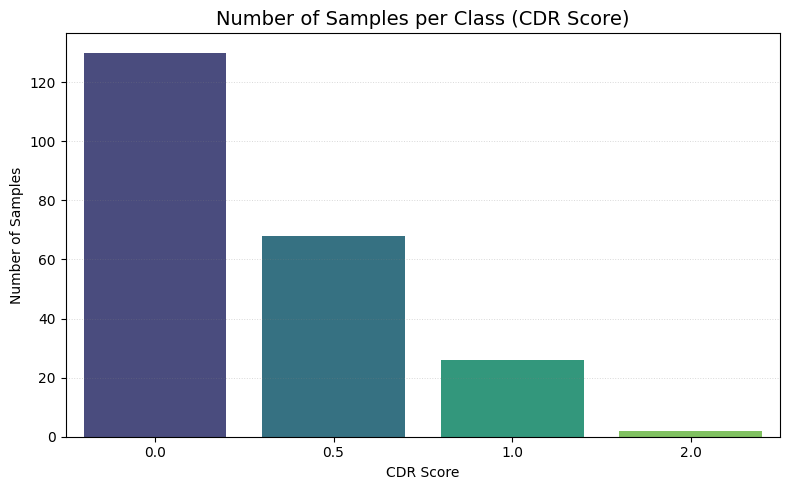

In [16]:
import seaborn as sns

# Count the samples per class and prepare a DataFrame for plotting
cdr_counts = ext_vars['cdr'].value_counts().sort_index()
cdr_df = pd.DataFrame({'CDR Score': cdr_counts.index.astype(str), 'Count': cdr_counts.values})

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=cdr_df, x='CDR Score', y='Count', hue='CDR Score', palette='viridis', legend=False)
plt.title('Number of Samples per Class (CDR Score)', fontsize=14)
plt.xlabel('CDR Score')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.3, linewidth=0.7)
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig("cdr_bar_plot.png", dpi=300, bbox_inches='tight')
plt.close()

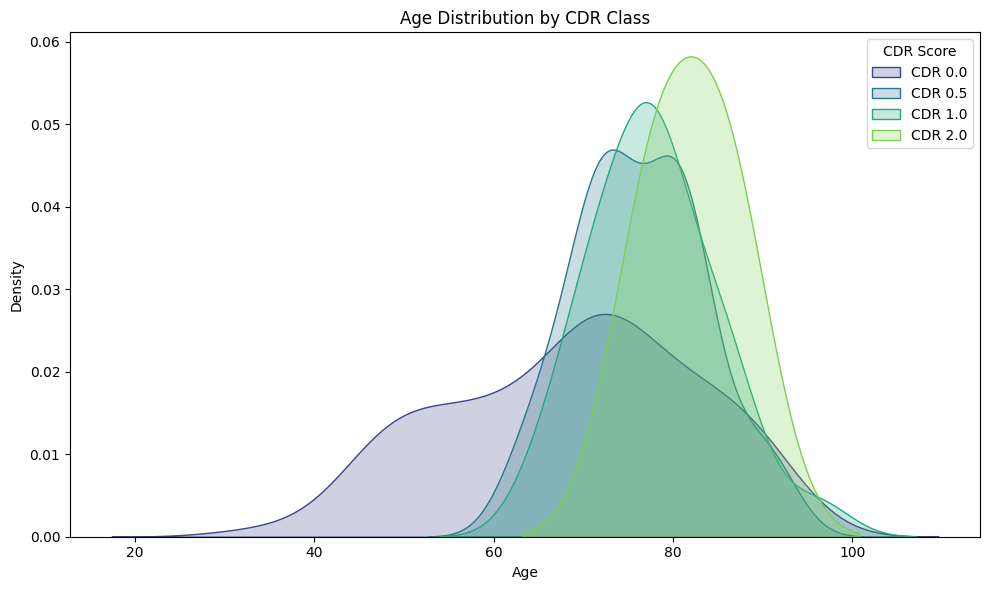

In [17]:
# Create a density plot
cdr_sorted = sorted(ext_vars['cdr'].dropna().unique())
cdr_labels = [str(cdr) for cdr in cdr_sorted]

# Create a color palette matching the number of unique CDR scores
palette = sns.color_palette('viridis', n_colors=len(cdr_labels))
cdr_color_map = dict(zip(cdr_labels, palette))

# Plot KDE curves
plt.figure(figsize=(10, 6))
for cdr_label in cdr_labels:
    sns.kdeplot(data=ext_vars[ext_vars['cdr'] == float(cdr_label)], x='age', fill=True, common_norm=False, color=cdr_color_map[cdr_label], label=f'CDR {cdr_label}')
# Legend and labels
plt.legend(title='CDR Score')
plt.title('Age Distribution by CDR Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig("density_plot.png", dpi=300, bbox_inches='tight')
plt.close()

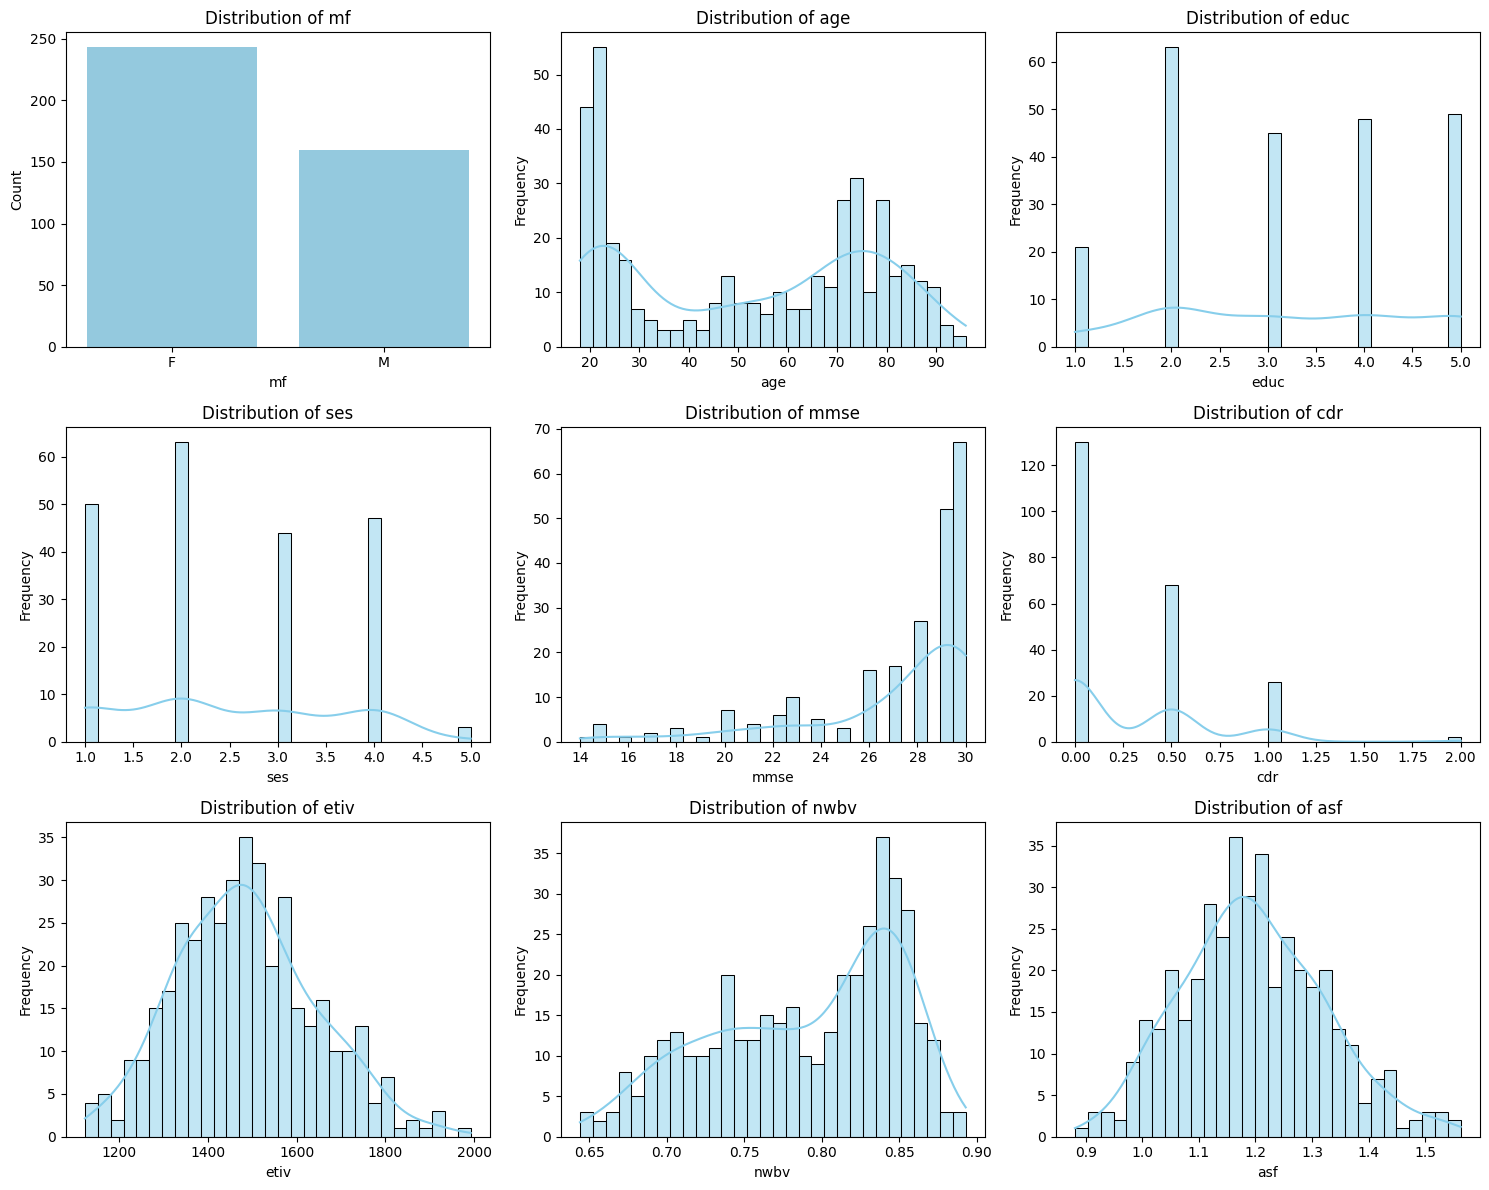

In [18]:
import seaborn as sns

# Define the features
features = ['mf', 'age', 'educ', 'ses', 'mmse', 'cdr', 'etiv', 'nwbv', 'asf']

# Set grid size
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)

    if col == 'mf':
        sns.countplot(data=ext_vars, x=col, color='skyblue')   # Countplot for categorical variable with light blue bars
        plt.ylabel("Count")
    else:
        sns.histplot(ext_vars[col].dropna(), kde=True, bins=30, color='skyblue')    # Histogram + KDE for numerical variables
        plt.ylabel("Frequency")

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Save the visalizations
plt.savefig("histograms.png", dpi=300, bbox_inches='tight')
plt.close()


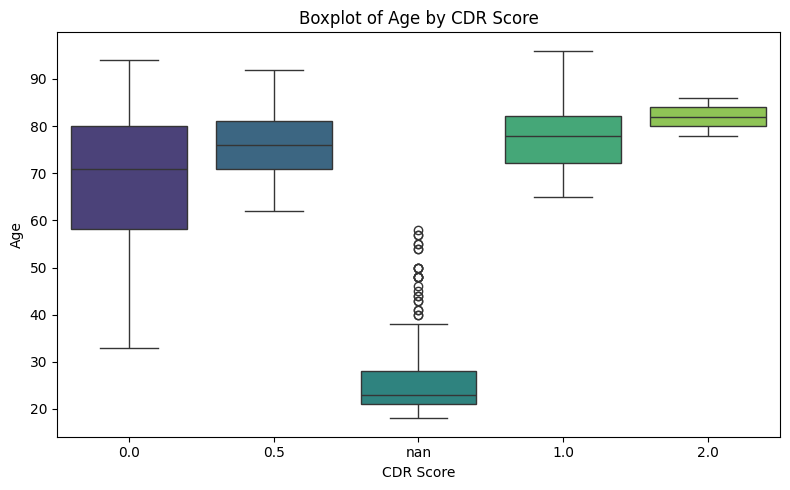

In [19]:
# Convert 'cdr' to string for labeling
ext_vars['cdr_str'] = ext_vars['cdr'].astype(str)

# Prepare color palette
cdr_order = sorted(ext_vars['cdr'].unique())
cdr_labels = [str(cdr) for cdr in cdr_order]
palette = sns.color_palette('viridis', n_colors=len(cdr_labels))
cdr_color_map = dict(zip(cdr_labels, palette))

# Plot the boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(x='cdr_str', y='age', hue='cdr_str', data=ext_vars, palette=cdr_color_map, order=cdr_labels, dodge=False, legend=False)
plt.title('Boxplot of Age by CDR Score')
plt.xlabel('CDR Score')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig("boxplots.png", dpi=300, bbox_inches='tight')
plt.close()


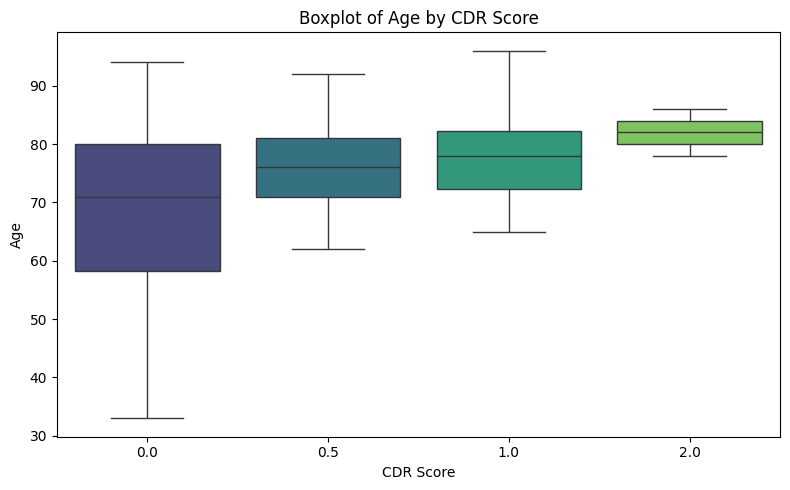

In [22]:
# Drop rows with NaN in 'cdr'
ext_vars_clean = ext_vars.dropna(subset=['cdr']).copy()

# Convert 'cdr' to string for labeling
ext_vars_clean['cdr_str'] = ext_vars_clean['cdr'].astype(str)

# Prepare color palette
cdr_order = sorted(ext_vars_clean['cdr'].unique())
cdr_labels = [str(cdr) for cdr in cdr_order]
palette = sns.color_palette('viridis', n_colors=len(cdr_labels))
cdr_color_map = dict(zip(cdr_labels, palette))

# Plot the boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(x='cdr_str', y='age', hue='cdr_str', data=ext_vars_clean, palette=cdr_color_map, order=cdr_labels, dodge=False, legend=False)
plt.title('Boxplot of Age by CDR Score')
plt.xlabel('CDR Score')
plt.ylabel('Age')
plt.tight_layout()

# Save the plot
plt.savefig("boxplots.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


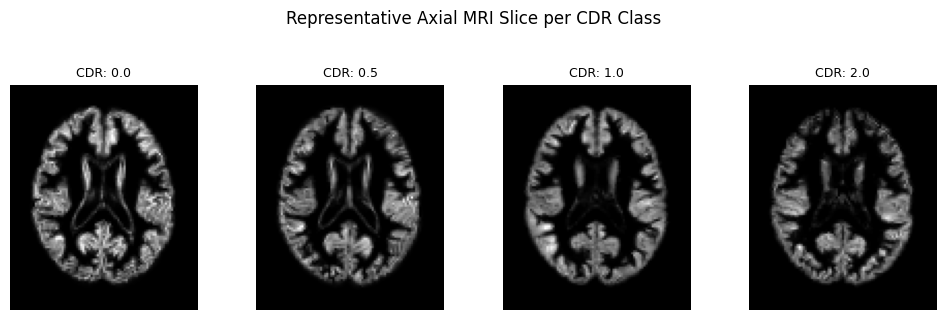

In [ ]:
import nibabel as nib

# Get sorted unique 'cdr' classes
unique_classes = sorted(ext_vars['cdr'].dropna().unique())

# Create subplots
fig, axes = plt.subplots(1, len(unique_classes), figsize=(10, 3))

# Plot one representative image per class
for i, cls in enumerate(unique_classes):
    subset = ext_vars[ext_vars['cdr'] == cls]
    if subset.empty:
        print(f"No image found for CDR = {cls}")
        continue

    idx = subset.index[0]
    img_path = oasis_data.gray_matter_maps[idx]

    img = nib.load(img_path)
    data = img.get_fdata()
    slice_ = data[:, :, data.shape[2] // 2]

    axes[i].imshow(np.rot90(slice_), cmap="gray")
    axes[i].set_title(f'CDR: {cls}', fontsize=9)
    axes[i].axis("off")

# Title and save
plt.suptitle("Representative Axial MRI Slice per CDR Class", fontsize=12, y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig("cdr_examples.png", dpi=300, bbox_inches='tight')


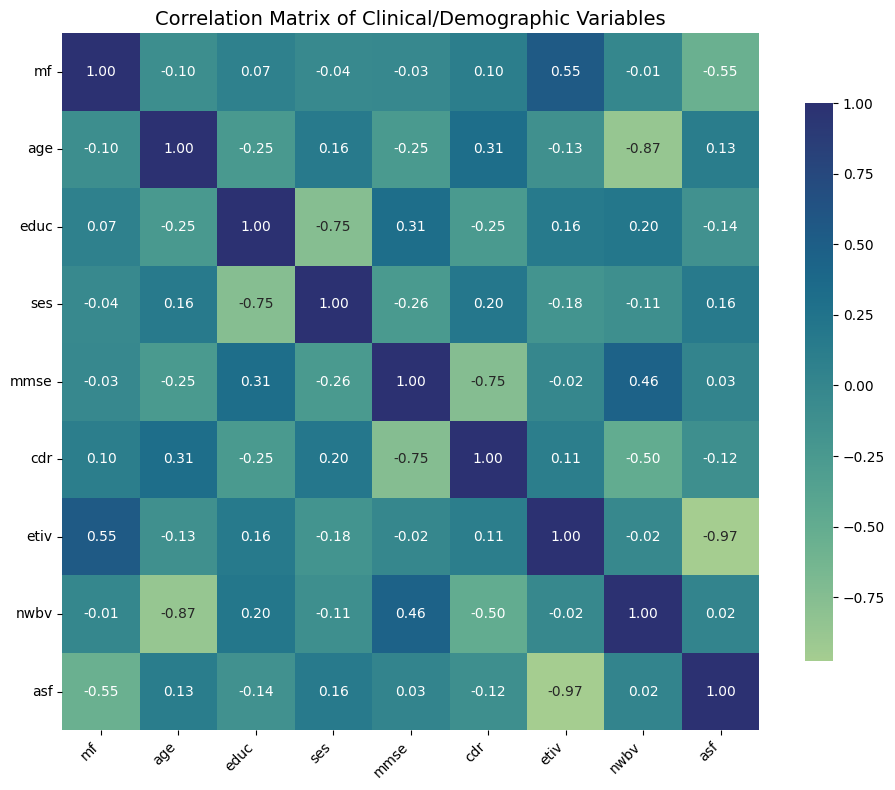

In [ ]:
# Drop 'delay' column
metadata_cleaned = ext_vars.drop(columns=['delay'], errors='ignore')

# Convert 'mf' to binary: M = 1, F = 0
metadata_cleaned['mf'] = metadata_cleaned['mf'].map({'M': 1, 'F': 0})

# Define the correct variable order
ordered_cols = ['mf', 'age', 'educ', 'ses', 'mmse', 'cdr', 'etiv', 'nwbv', 'asf']

# Ensure only numeric columns are included
numerical_cols = [col for col in ordered_cols if col in metadata_cleaned.columns and metadata_cleaned[col].dtype in ['float64', 'int64']]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    metadata_cleaned[numerical_cols].corr().loc[ordered_cols, ordered_cols],
    annot=True,
    cmap='crest',
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Clinical/Demographic Variables', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save and show the plot
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()


**Transform the task in a binary classification problem.**

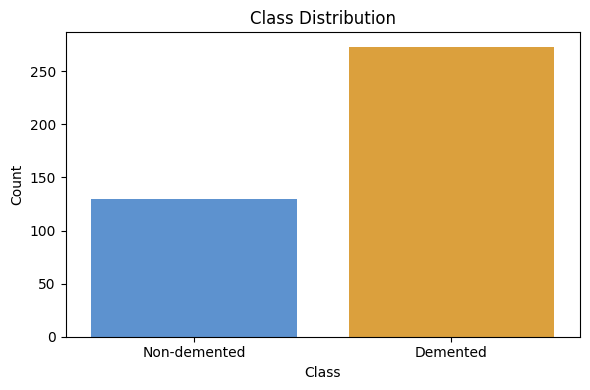

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create binary class labels
ext_vars['cdr_binary'] = ext_vars['cdr'].apply(lambda x: 'Non-demented' if x == 0.0 else 'Demented')

# Define the color palette, create the figure and define the axes
soft_palette = {'Non-demented': '#4A90E2', 'Demented': '#F5A623'}
plt.figure(figsize=(6, 4))
sns.countplot(data=ext_vars, x='cdr_binary', hue='cdr_binary', palette=soft_palette)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("binary_bar_chart.png", dpi=300)
plt.close()

In [ ]:
# Count the number of people in each class
class_counts = ext_vars['cdr'].apply(lambda x: 1 if x > 0 else 0).value_counts().sort_index()
print("Class Counts:")
print(f"Non-demented: {class_counts[0]}")
print(f"Demented: {class_counts[1]}")

Class Counts:
Non-demented: 307
Demented: 96


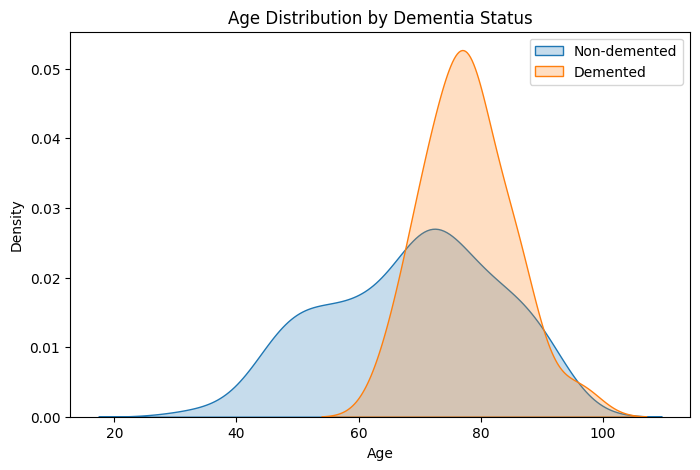

In [ ]:
# Age distribution by class
plt.figure(figsize=(8, 5))
sns.kdeplot(data=ext_vars[ext_vars['cdr'] == 0]['age'], label='Non-demented', fill=True)
sns.kdeplot(data=ext_vars[ext_vars['cdr'] == 1]['age'], label='Demented', fill=True)
plt.title('Age Distribution by Dementia Status')
plt.xlabel('Age')
plt.legend()
plt.show()

# Save the figure
plt.savefig("age_vs_dementia.png", dpi=300)
plt.close()

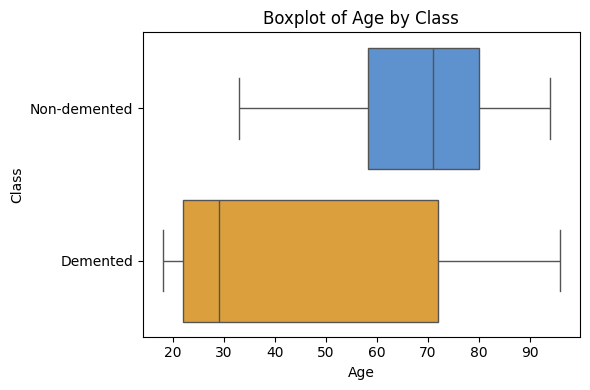

In [ ]:
# Define the soft color palette
soft_palette = {'Non-demented': '#4A90E2', 'Demented': '#F5A623'}

# Plot the boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='age', y='cdr_binary', data=ext_vars, palette=soft_palette, hue='cdr_binary')
plt.title('Boxplot of Age by Class')
plt.xlabel('Age')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("boxplots_binary", dpi=300)
plt.close()


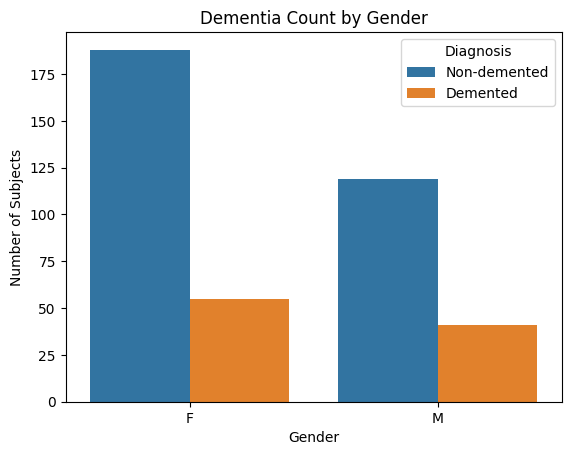

In [ ]:
# Create a new 'Group' column to classify subjects as 'Demented' or 'Non-demented' based on CDR scores.
# Then visualize the distribution of dementia cases by gender using a count plot.

ext_vars['Group'] = ext_vars['cdr'].apply(lambda x: 'Demented' if x > 0 else 'Non-demented')

sns.countplot(data=ext_vars, x='mf', hue='Group')
plt.title('Dementia Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Subjects')
plt.legend(title='Diagnosis')
plt.show()

# Save the figure
plt.savefig("gender_dementia.png", dpi=300)
plt.close()


# Conclusion: Men are more prone than women to dementia disease.

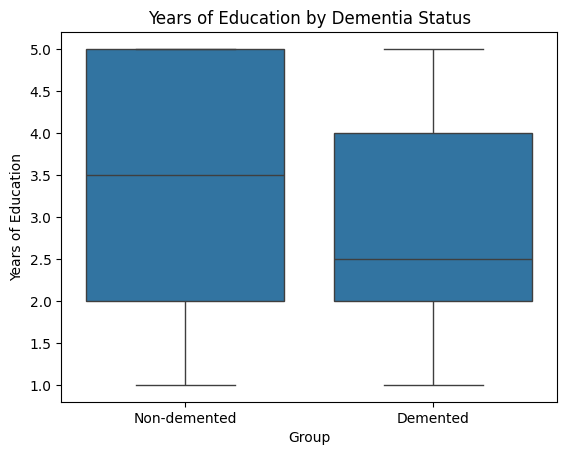

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Demented,96.0,2.833333,1.278705,1.0,2.0,2.5,4.0,5.0
Non-demented,130.0,3.438462,1.269828,1.0,2.0,3.5,5.0,5.0


In [ ]:
# Compare years of education between demented and non-demented groups using a boxplot.

sns.boxplot(data=ext_vars, x='Group', y='educ')
plt.title('Years of Education by Dementia Status')
plt.xlabel('Group')
plt.ylabel('Years of Education')
plt.show()

display(ext_vars.groupby('Group')['educ'].describe())   # display summary statistics to support visual observations

# Save the figure
plt.savefig("educ_vs_dementia.png", dpi=300)
plt.close()


# Conclusion: Demented patients had fewer years of education than healthy people.


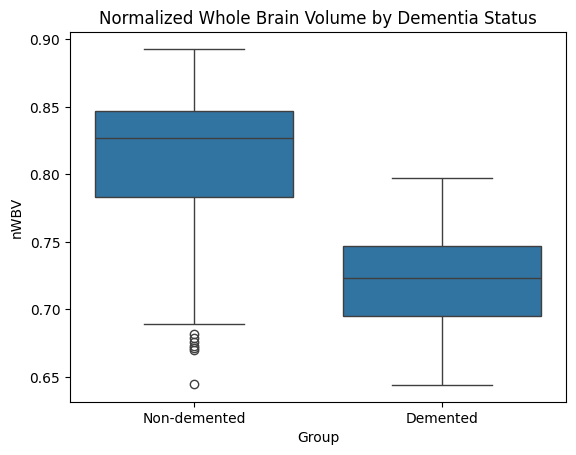

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Demented,96.0,0.722323,0.035935,0.644,0.69475,0.723,0.74725,0.797
Non-demented,307.0,0.811169,0.049746,0.645,0.78300,0.827,0.84700,0.893


In [ ]:
# Visualize and compare normalized whole brain volume (nWBV) between demented and non-demented groups using boxplots.

sns.boxplot(data=ext_vars, x='Group', y='nwbv')
plt.title('Normalized Whole Brain Volume by Dementia Status')
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.show()

display(ext_vars.groupby('Group')['nwbv'].describe())   #  display descriptive statistics to examine differences in brain volume by dementia status

# Save the figure
plt.savefig("nwbv_vs_dementia.png", dpi=300)
plt.close()

# Conclusion: Compared to the Demented group, the Nondemented group had a larger brain volume.

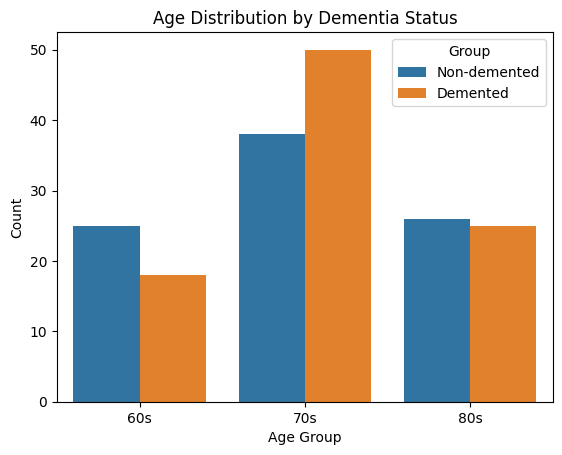

Group,Demented,Non-demented
AgeGroup,,
60s,41.860465,58.139535
70s,56.818182,43.181818
80s,49.019608,50.980392


In [ ]:
# Categorize subjects into age groups (60s, 70s, 80s), visualize the distribution of dementia status within each age group.
# And calculate the percentage of demented individuals per age group to highlight age-related trends in dementia prevalence.

# Create age bins
ext_vars['AgeGroup'] = pd.cut(ext_vars['age'], bins=[60, 70, 80, 90], labels=['60s', '70s', '80s'])

sns.countplot(data=ext_vars, x='AgeGroup', hue='Group')
plt.title('Age Distribution by Dementia Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

# Percentage of demented per age group
age_dementia_pct = pd.crosstab(ext_vars['AgeGroup'], ext_vars['Group'], normalize='index') * 100
display(age_dementia_pct)

# Save the figure
plt.savefig("age_group_dementia.png", dpi=300)
plt.close()

# Conclusion: Compared to Demented and non-demented patients, demented have a higher proportion of people in their 70s and 80s


**Pre-Processing**

In [ ]:
# Import the libraries
from nilearn.datasets import fetch_oasis_vbm
from nilearn.image import load_img
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn.maskers import NiftiMasker
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
from sklearn.impute import SimpleImputer


In [ ]:
# Fetch the Oasis VBM dataset
oasis_data=nilearn.datasets.fetch_oasis_vbm(n_subjects=None, dartel_version=True)

[fetch_oasis_vbm] Dataset found in /root/nilearn_data/oasis1

In [ ]:
# Load the DataFrame with clinical and demographic variables
ext_vars = pd.DataFrame(oasis_data['ext_vars'])

In [ ]:
# Load external variables
#ext_vars = oasis_data.ext_vars.copy()

# Set 'id' column as index
ext_vars = ext_vars.set_index('id')

# The 'hand' column is excluded because all subjects are right-handed, offering no variability or discriminatory power.
# The 'delay' column is removed as it consists entirely of Nans, providing no information for the analysis.
ext_vars = ext_vars.drop(columns=['hand', 'delay'], errors='ignore')

# Set all NaN values in 'cdr' to 0.0
ext_vars['cdr'] = ext_vars['cdr'].fillna(0.0)

# Impute 'mmse', 'ses', and 'educ' with their median values
median_imputer = SimpleImputer(strategy='median')
for col in ['mmse', 'ses', 'educ']:
    ext_vars[[col]] = median_imputer.fit_transform(ext_vars[[col]])

# Ensure 'etiv' is an integer after imputation
ext_vars['etiv'] = ext_vars['etiv'].astype(int)

# Encode the 'mf' column (Male/Female) to numerical values
label_encoder = LabelEncoder()
ext_vars['mf'] = label_encoder.fit_transform(ext_vars['mf'])

# Convert 'cdr' into a binary variable (0.0 == 0, 0.5/1.0/2.0 == 1)
ext_vars['cdr'] = ext_vars['cdr'].apply(lambda x: 0 if x == 0.0 else 1).astype(int)

# Reset index after processing
ext_vars.reset_index(drop=True, inplace=True)

# Check results
print(ext_vars.dtypes)
print(ext_vars.head())

mf        int64
age       int64
educ    float64
ses     float64
mmse    float64
cdr       int64
etiv      int64
nwbv    float64
asf     float64
dtype: object
   mf  age  educ  ses  mmse  cdr  etiv   nwbv    asf
0   0   74   2.0  3.0  29.0    0  1344  0.743  1.306
1   0   55   4.0  1.0  29.0    0  1147  0.810  1.531
2   0   73   4.0  3.0  27.0    1  1454  0.708  1.207
3   1   28   3.0  2.0  29.0    0  1588  0.803  1.105
4   1   18   3.0  2.0  29.0    0  1737  0.848  1.010


**Processing step for Random Forest**

In [ ]:
# Process gray matter maps
nifti_masker = NiftiMasker(standardize=False, smoothing_fwhm=2, memory="nilearn_cache")
gm_maps_masked = nifti_masker.fit_transform(oasis_data.gray_matter_maps)

In [ ]:
# Feature selection: remove low-variance voxels
variance_threshold = VarianceThreshold(threshold=0.01)
gm_maps_masked_filtered = variance_threshold.fit_transform(gm_maps_masked)

In [ ]:
# Create voxel-level feature DataFrame
voxel_columns = [f"voxel_{i}" for i in range(gm_maps_masked_filtered.shape[1])]
X_df = pd.DataFrame(gm_maps_masked_filtered, columns=voxel_columns)

In [ ]:
# Combine clinical and voxel data
final_df = pd.concat([ext_vars.reset_index(drop=True), X_df.reset_index(drop=True)], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Data split and standardization

# Create a list with the features
clinical_features = ['mf', 'age', 'educ', 'ses', 'mmse', 'etiv', 'nwbv', 'asf']
all_features = clinical_features + voxel_columns

# Target
X = final_df[all_features]
y = final_df['cdr']

# Split into train+val and test (80/20 stratified)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split train+val into train and val (80/20 stratified)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

print("\nData splits:")
print(f"Train: {X_train.shape[0]} samples")
print(f"Val: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

# Define the preprocessor: scale clinical features, pass voxels unchanged
preprocessor = ColumnTransformer(transformers=[('clinical', StandardScaler(), clinical_features),('voxels', 'passthrough', voxel_columns)])

# Fit scaler on training data only and transform val, test
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)




Data splits:
Train: 257 samples
Val: 65 samples
Test: 81 samples


**Random forest**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 20.2 MB/s eta 0:00:00


In [ ]:
import random
import tensorflow as tf
import numpy as np
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             precision_score, recall_score, f1_score,
                             roc_auc_score, log_loss, brier_score_loss,
                             confusion_matrix, classification_report)
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from optuna.visualization.matplotlib import plot_optimization_history

In [ ]:
from sklearn.metrics import (roc_curve, auc, precision_recall_curve)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter

In [ ]:
# Some of the RF hyperparamters are taken from this paper
# Aslan, E., & Özüpak, Y. (2025). Comparison of machine learning algorithms for automatic prediction of Alzheimer disease. Journal of the Chinese Medical Association, 88(2), 98-107.

In [ ]:
# Set random state and number of folds for StratifiedKFold
n_splits = 5
random_state = 42
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

In [ ]:
import os
from codecarbon import EmissionsTracker

# Ensure the output folder exists
output_folder = "/content/drive/MyDrive/codecarbon_summary/"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
# Import the OfflineEmissionsTracker from CodeCarbon
from codecarbon import OfflineEmissionsTracker

# Initialize the emissions tracker
tracker = OfflineEmissionsTracker(output_dir="/content/drive/MyDrive/codecarbon_summary/", output_file="RF_emissions.csv", country_iso_code="NLD", measure_power_secs=10)
tracker.start()

[codecarbon INFO @ 04:29:53] offline tracker init
[codecarbon WARNING @ 04:29:53] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 04:29:53] [setup] RAM Tracking...
[codecarbon INFO @ 04:29:53] [setup] CPU Tracking...
[codecarbon WARNING @ 04:29:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 04:29:54] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 04:29:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 04:29:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 04:29:54] [setup] GPU Tracking...
[codecarbon INFO @ 04:29:54] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:29:54] The below tracking methods have been set up:
            

In [ ]:
# Define the Optuna objective function
def Objective_rf(trial):
    # Define hyperparameters to tune
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100, 700, step=50)
    max_features = trial.suggest_categorical("max_features", ['log2', 'sqrt'])
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss'])
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 14, step=2)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 14, step=2)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Define the classifier
    clf_rf = RandomForestClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        max_features=max_features,
        criterion=criterion,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        bootstrap=bootstrap,
        class_weight='balanced',
        random_state=random_state,
        n_jobs=-1)

    # Cross-validation with f1 scoring
    scores = cross_val_score(clf_rf, X_train, y_train, cv=stratified_kfold, scoring='f1')
    return scores.mean()


In [ ]:
start_tune = perf_counter()

# Run the Optuna optimization
study_rf = optuna.create_study(study_name='RF_hyperparameter_optimization', direction='maximize')  # in this binary classification the goal is to maximize f1 score
study_rf.optimize(Objective_rf, n_trials=30)

end_tune = perf_counter()
tuning_time = end_tune - start_tune
print(f"Hyperparameter‑tuning time: {tuning_time:.2f} s")

# Extract the best hyperparameters
best_rf_params = study_rf.best_params
print("\nBest Hyperparameters:", best_rf_params)


[codecarbon INFO @ 04:30:04] Energy consumed for RAM : 0.000028 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:30:04] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 04:30:04] Energy consumed for All CPU : 0.000118 kWh
[codecarbon INFO @ 04:30:04] Energy consumed for all GPUs : 0.000079 kWh. Total GPU Power : 28.439450266112722 W
[codecarbon INFO @ 04:30:04] 0.000225 kWh of electricity used since the beginning.
[codecarbon INFO @ 04:30:14] Energy consumed for RAM : 0.000056 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:30:14] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 04:30:14] Energy consumed for All CPU : 0.000236 kWh
[codecarbon INFO @ 04:30:14] Energy consumed for all GPUs : 0.000158 kWh. Total GPU Power : 28.48305829379047 W
[codecarbon INFO @ 04:30:14] 0.000450 kWh of electricity used since the beginning.
[codecarbon INFO @ 04:30:24] Energy consumed for RAM : 0.000083 kWh. RAM Power : 

Hyperparameter‑tuning time: 436.52 s

Best Hyperparameters: {'max_depth': 22, 'n_estimators': 300, 'max_features': 'log2', 'criterion': 'gini', 'min_samples_leaf': 12, 'min_samples_split': 10, 'bootstrap': False}


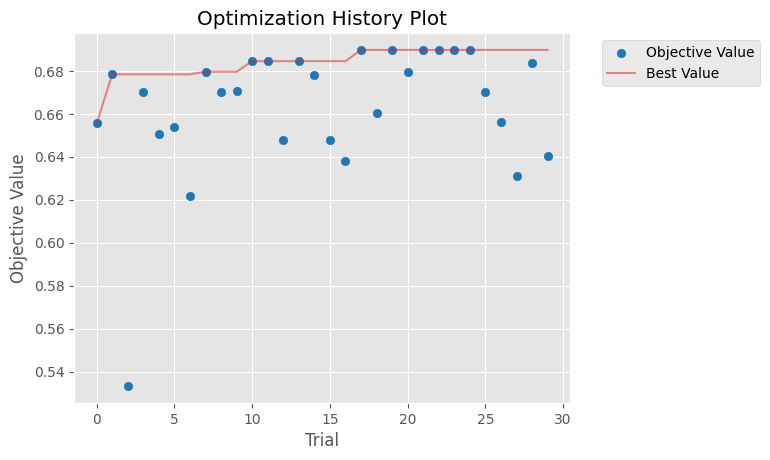

In [ ]:
#  Visualize optimization history
optuna.visualization.matplotlib.plot_optimization_history(study_rf)
plt.savefig(os.path.join(save_path, "optimization_history_rf.png"), dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final_params_rf = dict(max_depth=best_rf_params['max_depth'], n_estimators = best_rf_params['n_estimators'],
                        max_features = best_rf_params['max_features'], criterion = best_rf_params['criterion'], min_samples_leaf = best_rf_params['min_samples_leaf'],
                        min_samples_split = best_rf_params['min_samples_split'], bootstrap = best_rf_params['bootstrap'])

In [ ]:
# Istantiate the classifier with the best hyperparameters found
clf_tuned_rf = RandomForestClassifier(**final_params_rf, class_weight='balanced', random_state=42, n_jobs=-1)


In [ ]:
start_train = perf_counter()

# Fit the model
clf_tuned_rf.fit(X_trainval, y_trainval)

end_train = perf_counter()
training_time = end_train - start_train
print(f"Final model training time: {training_time:.2f} s")

Final model training time: 1.71 s


In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, log_loss, brier_score_loss, roc_auc_score, classification_report)

def evaluate_model(y_true, y_pred, y_proba, class_names=None):
    if class_names is None:
        class_names = ['Non‑Demented', 'Demented']

    # Convert to NumPy
    y_true  = np.asarray(y_true)
    y_pred  = np.asarray(y_pred)
    y_proba = np.asarray(y_proba)
    if y_proba.ndim > 1:
        y_proba = y_proba[:, 1]

    # Compute the metrics
    accuracy      = accuracy_score(y_true, y_pred)
    balanced_acc  = balanced_accuracy_score(y_true, y_pred)
    precision     = precision_score(y_true, y_pred)
    recall        = recall_score(y_true, y_pred)
    f1            = f1_score(y_true, y_pred)
    logloss       = log_loss(y_true, y_proba)
    brier         = brier_score_loss(y_true, y_proba)
    roc_auc       = roc_auc_score(y_true, y_proba)

    # Print the results
    print(f"Accuracy:             {accuracy:.4f}")
    print(f"Balanced accuracy:    {balanced_acc:.4f}")
    print(f"Precision:            {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 score:             {f1:.4f}")
    print(f"Log loss:             {logloss:.4f}")
    print(f"Brier score:          {brier:.4f}")
    print(f"AUC‑ROC:              {roc_auc:.4f}")

    print("\nClassification report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
# Make predictions on the Test Set
X_test = pd.DataFrame(X_test, columns=clf_tuned_rf.feature_names_in_)

start_test = perf_counter()

y_test_pred = clf_tuned_rf.predict(X_test)  # Class labels (0/1)
y_test_proba = clf_tuned_rf.predict_proba(X_test)[:, 1]

end_test = perf_counter()
inference_time = end_test - start_test
print(f"Test‑set inference time: {inference_time:.4f} s")

Test‑set inference time: 1.2331 s


In [ ]:
# Call the function and compute the metrics
test_metrics = evaluate_model(y_true=y_test, y_pred=y_test_pred, y_proba=y_test_proba, class_names=['Non-Demented', 'Demented'])


Accuracy:             0.8025
Balanced accuracy:    0.8345
Precision:            0.5484
Recall (Sensitivity): 0.8947
F1 score:             0.6800
Log loss:             0.4757
Brier score:          0.1550
AUC‑ROC:              0.8489

Classification report:
              precision    recall  f1-score   support

Non-Demented       0.96      0.77      0.86        62
    Demented       0.55      0.89      0.68        19

    accuracy                           0.80        81
   macro avg       0.75      0.83      0.77        81
weighted avg       0.86      0.80      0.82        81



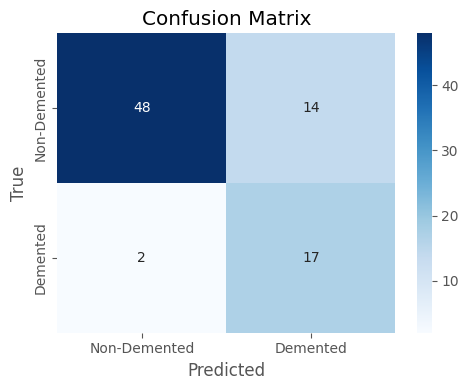

In [ ]:
# Define the function to create the confusion matrix
def confusion_matrix_plot(y_true, y_pred, class_names=None):
    if class_names is None:
        class_names = ['Non-Demented', 'Demented']

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    return fig

# Call the function and save the plot
fig = confusion_matrix_plot(y_test, y_test_pred)
fig.savefig(os.path.join(save_path, "confusion_matrix_rf.png"), dpi=300)
plt.close(fig)


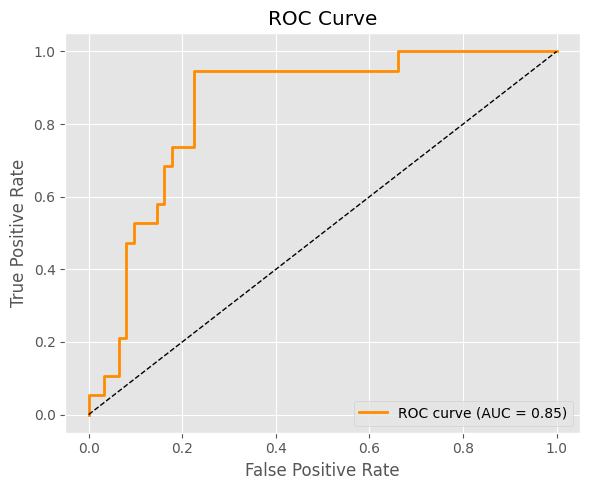

In [ ]:
# Create the ROC AUC curve plot

def roc_curve_plot(y_true, y_proba):
    y_proba = np.asarray(y_proba).ravel()
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, color='darkorange', label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    return fig

fig = roc_curve_plot(y_test, y_test_proba)
fig.savefig(os.path.join(save_path, "roc_curve_rf.png"), dpi=300)
plt.show()


In [ ]:
tracker.stop()

[codecarbon INFO @ 04:41:31] Energy consumed for RAM : 0.001932 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:41:31] Delta energy consumed for CPU with constant : 0.000071 kWh, power : 42.5 W
[codecarbon INFO @ 04:41:31] Energy consumed for All CPU : 0.008214 kWh
[codecarbon INFO @ 04:41:31] Energy consumed for all GPUs : 0.005528 kWh. Total GPU Power : 28.548251883204355 W
[codecarbon INFO @ 04:41:31] 0.015674 kWh of electricity used since the beginning.


0.0041946295492984766

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os

# Save the report in a CSV and excel file
output_folder = '/content/drive/MyDrive/codecarbon_summary'
csv_path = os.path.join(output_folder, "RF_emissions.csv")
excel_path = os.path.join(output_folder, "RF_emissions.xlsx")

df = pd.read_csv(csv_path)
df.to_excel(excel_path, index=False)


**CNN+XGBoost**

In [ ]:
import random
import tensorflow as tf
import numpy as np
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import optuna
import numpy as np
import cv2
import warnings
from tensorflow.keras import layers, models, Input, Model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from nilearn.image import load_img
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from time import perf_counter
import warnings
from codecarbon import OfflineEmissionsTracker


In [ ]:
# CNN+XGBOOST model is taken from Ren, X., Guo, H., Li, S., Wang, S., & Li, J. (2017). A novel image classification method with CNN-XGBoost model.
# In Digital Forensics and Watermarking: 16th International Workshop, IWDW 2017, Magdeburg, Germany, August 23-25, 2017, Proceedings 16 (pp. 378-390). Springer International Publishing.

In [ ]:
img_size = 64

# Load 2D slice extraction
def extract_2d_slice_from_nifti(paths, img_size):
    slices = []
    for path in paths:
        img_3d = load_img(path).get_fdata()
        if img_3d.ndim == 3:
            z_center = img_3d.shape[2] // 2
            img_2d = img_3d[:, :, z_center]
            img_resized = cv2.resize(img_2d, (img_size, img_size), interpolation=cv2.INTER_AREA)
            slices.append(img_resized)
    return np.array(slices)

# Load images and labels
X = extract_2d_slice_from_nifti(oasis_data['gray_matter_maps'], img_size)

# Standardize each image
X = np.array([(img - np.mean(img)) / (np.std(img) + 1e-8) for img in X], dtype=np.float32)

ext_vars['cdr'] = ext_vars['cdr'].apply(lambda x: 0 if x == 0.0 else 1).astype(int)
y = ext_vars['cdr'].values
X = X[..., np.newaxis]  # Add channel


In [ ]:
# Split the data into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the trainval set into separate train and val sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval, random_state=42)

In [ ]:
# Build the CNN+XGBoost Model
def build_cnn_model(n_filters1, n_filters2, input_shape=(64, 64, 1)):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(n_filters1, kernel_size=5, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(n_filters2, kernel_size=5, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten(name='flatten_layer')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the Feature Extractor
def create_feature_extractor(trained_model):
    return Model(inputs=trained_model.input,
                 outputs=trained_model.get_layer('flatten_layer').output)


In [ ]:
# Define extract_features using create_feature_extractor
def extract_features(trained_cnn_model, data):
    feature_extractor = create_feature_extractor(trained_cnn_model)
    features = feature_extractor.predict(data, batch_size=32, verbose=0)
    return features

In [ ]:
# Initialize the Tracker
tracker = OfflineEmissionsTracker(output_dir="/content/drive/MyDrive/codecarbon_summary/", output_file="CNN+XGBoost_emissions.csv", country_iso_code="NLD", measure_power_secs=10)
tracker.start()

[codecarbon INFO @ 05:40:26] offline tracker init
[codecarbon WARNING @ 05:40:26] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 05:40:26] [setup] RAM Tracking...
[codecarbon INFO @ 05:40:26] [setup] CPU Tracking...
[codecarbon WARNING @ 05:40:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 05:40:27] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 05:40:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 05:40:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 05:40:27] [setup] GPU Tracking...
[codecarbon INFO @ 05:40:27] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 05:40:27] The below tracking methods have been set up:
            

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import numpy as np
import optuna

def objective(trial):
    # CNN hyperparameters
    n_filters1 = trial.suggest_int("n_filters1", 22, 40, step=2)
    n_filters2 = trial.suggest_int("n_filters2", 24, 72, step=8)

    # XGBoost hyperparameters
    n_estimators = trial.suggest_categorical("n_estimators", [100, 200, 300, 400, 500])
    max_depth = trial.suggest_categorical("max_depth", [4, 6, 8, 10, 12])
    learning_rate = trial.suggest_categorical("learning_rate", [0.005, 0.01, 0.05, 0.1, 0.2])

    # 5-fold stratified CV
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Check class balance to prune early if needed
        if len(np.unique(y_tr)) < 2 or len(np.unique(y_val)) < 2:
            raise optuna.exceptions.TrialPruned()

        # Train CNN
        cnn = build_cnn_model(n_filters1, n_filters2)
        cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        cnn.fit(X_tr, y_tr,
                validation_data=(X_val, y_val),
                epochs=30, batch_size=32,
                verbose=0)

        # Extract features from CNN
        X_tr_feat = extract_features(cnn, X_tr)
        X_val_feat = extract_features(cnn, X_val)

        # Compute scale_pos_weight for XGBoost in this fold
        neg = np.sum(y_tr == 0)
        pos = np.sum(y_tr == 1)
        if pos == 0:
            raise optuna.exceptions.TrialPruned()
        scale_pos_weight = neg / pos

        # Train XGBoost on extracted features with scale_pos_weight
        xgb = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            scale_pos_weight=scale_pos_weight,
            use_label_encoder=False,
            eval_metric='logloss',
            verbosity=0,
            tree_method='gpu_hist',
            predictor='cpu_predictor',
            n_jobs=-1)
        xgb.fit(X_tr_feat, y_tr)

        # Predict with XGBoost on validation fold
        y_val_pred = xgb.predict(X_val_feat)
        f1 = f1_score(y_val, y_val_pred, average='binary')
        f1_scores.append(f1)
    return np.mean(f1_scores)

In [ ]:
start_tune = perf_counter()

# Create the study and run the optimization
study_cnnxgboost = optuna.create_study(study_name='cnnxgboost_hyperparameter_optimization', direction="maximize")
study_cnnxgboost.optimize(objective, n_trials=30, n_jobs=1)

end_tune = perf_counter()
tuning_time = end_tune - start_tune
print(f"Hyperparameter‑tuning time: {tuning_time:.2f} s")

# Best hyperparameters
best_cnnxgboost_params = study_cnnxgboost.best_params
print("Best hyperparameters:", study_cnnxgboost.best_trial.params)


[codecarbon INFO @ 05:40:57] Energy consumed for RAM : 0.000317 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 05:40:57] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 05:40:57] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 05:40:57] Energy consumed for all GPUs : 0.000421 kWh. Total GPU Power : 51.88444385814487 W
[codecarbon INFO @ 05:40:57] 0.001092 kWh of electricity used since the beginning.
[codecarbon INFO @ 05:41:07] Energy consumed for RAM : 0.000422 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 05:41:07] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 05:41:07] Energy consumed for All CPU : 0.000472 kWh
[codecarbon INFO @ 05:41:07] Energy consumed for all GPUs : 0.000559 kWh. Total GPU Power : 49.63367624165684 W
[codecarbon INFO @ 05:41:07] 0.001453 kWh of electricity used since the beginning.
[codecarbon INFO @ 05:41:17] Energy consumed for RAM : 0.000528 kWh. RAM Power : 3

Hyperparameter‑tuning time: 3066.46 s
Best hyperparameters: {'n_filters1': 26, 'n_filters2': 56, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2}


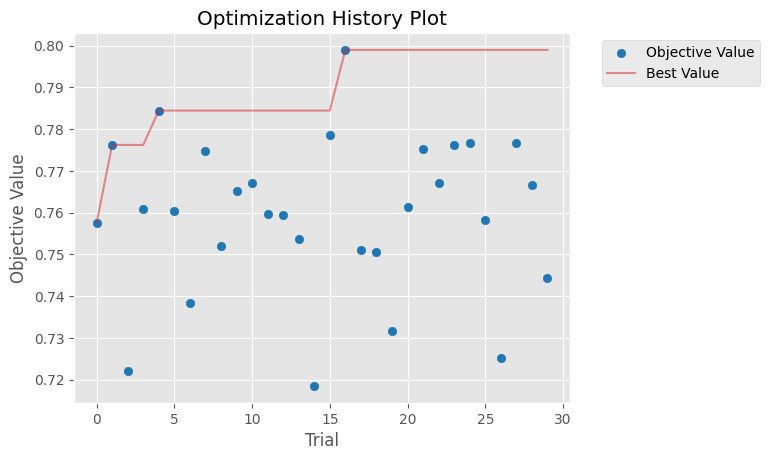

In [ ]:
#  Visualize optimization history
optuna.visualization.matplotlib.plot_optimization_history(study_cnnxgboost)
plt.savefig(os.path.join(save_path, "optimization_history_cnnxgboost.png"), dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
cnnxgboost_params = study_cnnxgboost.best_params
print(cnnxgboost_params)

{'n_filters1': 26, 'n_filters2': 56, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2}


In [ ]:
final_params_cnnxgboost = dict(n_filters1=cnnxgboost_params['n_filters1'], n_filters2 = cnnxgboost_params['n_filters2'],
                        n_estimators = cnnxgboost_params['n_estimators'], max_depth = cnnxgboost_params['max_depth'], learning_rate = cnnxgboost_params['learning_rate'])

In [ ]:
# Redefine the CNN+XGBoost architecture
def build_cnn_model(n_filters1, n_filters2, input_shape=(64, 64, 1)):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(n_filters1, kernel_size=5, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(n_filters2, kernel_size=5, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten(name='flatten_layer')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Feature Extractor
def create_feature_extractor(trained_model):
    return Model(inputs=trained_model.input,
                 outputs=trained_model.get_layer('flatten_layer').output)



In [ ]:
# Retrain the model with the best hyperparameters found
final_params_cnnxgboost = {'n_filters1': 26, 'n_filters2': 56, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2}

start_train = perf_counter()

cnn_final = build_cnn_model(final_params_cnnxgboost['n_filters1'], final_params_cnnxgboost['n_filters2'])
cnn_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = cnn_final.fit(X_trainval, y_trainval, validation_split=0.2, epochs=30, batch_size=32, verbose=1)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5956 - loss: 0.7350 - val_accuracy: 0.7077 - val_loss: 0.6734
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6871 - loss: 0.6651 - val_accuracy: 0.7077 - val_loss: 0.6175
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6871 - loss: 0.6316 - val_accuracy: 0.7077 - val_loss: 0.6084
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6871 - loss: 0.6213 - val_accuracy: 0.7077 - val_loss: 0.6122
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6871 - loss: 0.6195 - val_accuracy: 0.7077 - val_loss: 0.6047
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6871 - loss: 0.6130 - val_accuracy: 0.7077 - val_loss: 0.6050
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6871 - loss: 0.6081 - val_accuracy: 0.7077 - val_loss: 0.6019
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6871 - loss: 0.6027 - val_accuracy: 0.7077 - val_loss: 0.6008


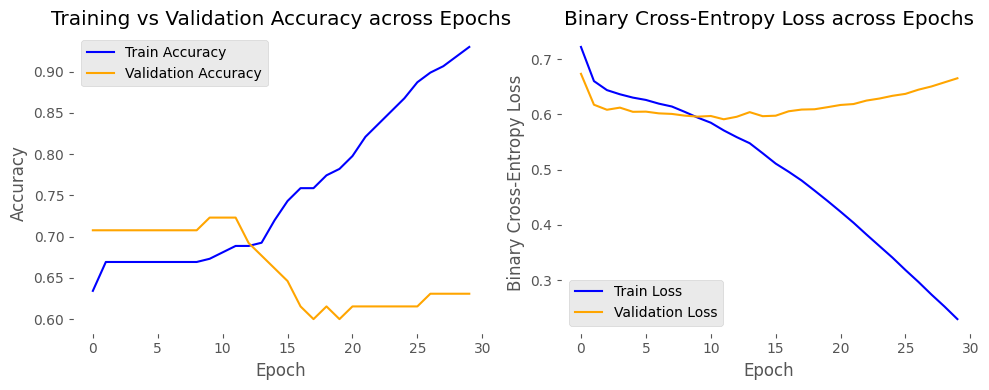

In [ ]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
fig = plt.figure(figsize=(10, 4), facecolor='white')

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy across Epochs')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('white')

# Binary Cross-Entropy Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Binary Cross-Entropy Loss across Epochs')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('white')
plt.tight_layout()

# Save the plots on Drive
save_path = '/content/drive/My Drive/Thesis_Plots/cnn_training_plots.png'
plt.savefig(save_path, dpi=300, facecolor=fig.get_facecolor())
plt.show()

In [ ]:
# Extract the Features from the CNN to make the final classification
feature_extractor_final = create_feature_extractor(cnn_final)
X_trainval_feat = feature_extractor_final.predict(X_trainval, batch_size=32, verbose=0)
X_test_feat = feature_extractor_final.predict(X_test, batch_size=32, verbose=0)

# Compute scale_pos_weight for the entire training set
neg = np.sum(y_trainval == 0)
pos = np.sum(y_trainval == 1)
scale_pos_weight = neg / pos

# Train the final XGBoost Classifier
xgb_final = XGBClassifier(
    n_estimators=final_params_cnnxgboost['n_estimators'],
    max_depth=final_params_cnnxgboost['max_depth'],
    learning_rate=final_params_cnnxgboost['learning_rate'],
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=1,
    tree_method='hist',
    n_jobs=-1)

xgb_final.fit(X_trainval_feat, y_trainval)

end_train = perf_counter()
training_time = end_train - start_train
print(f"Final model training time: {training_time:.2f} s")


[codecarbon INFO @ 06:37:18] Energy consumed for RAM : 0.035975 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:37:18] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:37:18] Energy consumed for All CPU : 0.040242 kWh
[codecarbon INFO @ 06:37:18] Energy consumed for all GPUs : 0.047881 kWh. Total GPU Power : 50.13044666356976 W
[codecarbon INFO @ 06:37:18] 0.124098 kWh of electricity used since the beginning.
[codecarbon INFO @ 06:37:28] Energy consumed for RAM : 0.036080 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:37:28] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:37:28] Energy consumed for All CPU : 0.040360 kWh
[codecarbon INFO @ 06:37:28] Energy consumed for all GPUs : 0.048020 kWh. Total GPU Power : 50.147004790812275 W
[codecarbon INFO @ 06:37:28] 0.124461 kWh of electricity used since the beginning.


Final model training time: 41.12 s


In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, log_loss, brier_score_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc)
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, y_proba, class_names=None):
    if class_names is None:
        class_names = ['Non‑Demented', 'Demented']
    y_true  = np.asarray(y_true)
    y_pred  = np.asarray(y_pred)
    y_proba = np.asarray(y_proba)

    if y_proba.ndim > 1:
        y_proba = y_proba[:, 1]

    # Compute the metrics
    accuracy      = accuracy_score(y_true, y_pred)
    balanced_acc  = balanced_accuracy_score(y_true, y_pred)
    precision     = precision_score(y_true, y_pred)
    recall        = recall_score(y_true, y_pred)
    f1            = f1_score(y_true, y_pred)
    logloss       = log_loss(y_true, y_proba)
    brier         = brier_score_loss(y_true, y_proba)
    roc_auc       = roc_auc_score(y_true, y_proba)

    # Print the results
    print(f"Accuracy:             {accuracy:.4f}")
    print(f"Balanced accuracy:    {balanced_acc:.4f}")
    print(f"Precision:            {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 score:             {f1:.4f}")
    print(f"Log loss:             {logloss:.4f}")
    print(f"Brier score:          {brier:.4f}")
    print(f"AUC‑ROC:              {roc_auc:.4f}")

    print("\nClassification report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
start_test = perf_counter()

# Predict on the test set using XGBoost
y_test_pred = xgb_final.predict(X_test_feat)  # Predicted class labels (0/1)
y_test_proba = xgb_final.predict_proba(X_test_feat)[:, 1]  # Probabilities for class 1 (Demented)

end_test = perf_counter()
inference_time = end_test - start_test
print(f"Test‑set inference time: {inference_time:.4f} s")

Test‑set inference time: 0.0264 s


In [ ]:
# Call the function and compute the metrics
test_metrics = evaluate_model(y_true=y_test, y_pred=y_test_pred, y_proba=y_test_proba, class_names=['Non-Demented', 'Demented'])


Accuracy:             0.7778
Balanced accuracy:    0.6843
Precision:            0.7761
Recall (Sensitivity): 0.9455
F1 score:             0.8525
Log loss:             0.6444
Brier score:          0.1907
AUC‑ROC:              0.7476

Classification report:
              precision    recall  f1-score   support

Non-Demented       0.79      0.42      0.55        26
    Demented       0.78      0.95      0.85        55

    accuracy                           0.78        81
   macro avg       0.78      0.68      0.70        81
weighted avg       0.78      0.78      0.76        81



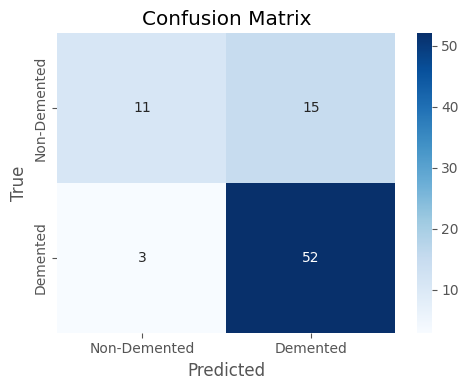

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define dir
save_dir = "/content/drive/My Drive/Thesis_Plots"
filename = "confusion_matrix_cnnxgboost.png"

os.makedirs(save_dir, exist_ok=True)

# Confusion‑matrix plotting function
def confusion_matrix_plot(y_true, y_pred, class_names=None):
    if class_names is None:
        class_names = ['Non‑Demented', 'Demented']

    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    return fig

# Plot and save
fig = confusion_matrix_plot(y_test, y_test_pred)
fig.savefig(os.path.join(save_dir, filename), dpi=300)
plt.close(fig)


[codecarbon INFO @ 06:41:58] Energy consumed for RAM : 0.038929 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:41:58] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:41:58] Energy consumed for All CPU : 0.043547 kWh
[codecarbon INFO @ 06:41:58] Energy consumed for all GPUs : 0.051763 kWh. Total GPU Power : 50.10566541299937 W
[codecarbon INFO @ 06:41:58] 0.134239 kWh of electricity used since the beginning.


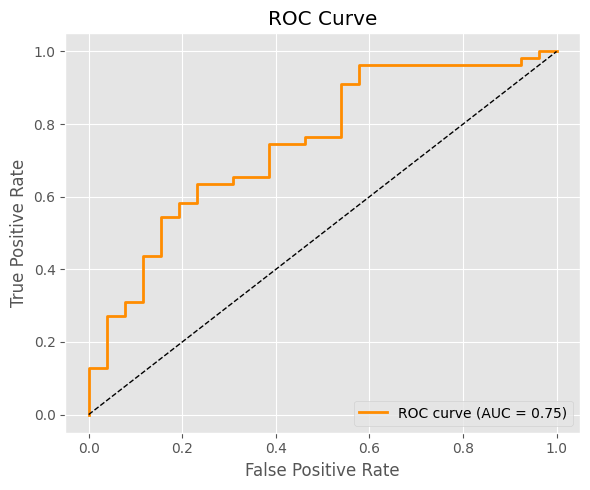

In [ ]:
from sklearn.metrics import roc_curve, auc

# Create the ROC AUC curve plot
def roc_curve_plot(y_true, y_proba):
    y_proba = np.asarray(y_proba).ravel()
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, color='darkorange',label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    return fig

fig = roc_curve_plot(y_test, y_test_proba)
fig.savefig(os.path.join(save_folder, "roc_curve_cnnxgboost.png"), dpi=300)
plt.close(fig)

In [ ]:
tracker.stop()

[codecarbon INFO @ 06:42:32] Energy consumed for RAM : 0.039281 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:42:32] Delta energy consumed for CPU with constant : 0.000040 kWh, power : 42.5 W
[codecarbon INFO @ 06:42:32] Energy consumed for All CPU : 0.043940 kWh
[codecarbon INFO @ 06:42:32] Energy consumed for all GPUs : 0.052225 kWh. Total GPU Power : 50.45167749081102 W
[codecarbon INFO @ 06:42:32] 0.135447 kWh of electricity used since the beginning.


0.036248520948676026

In [ ]:
import os
import pandas as pd
import warnings

output_folder = "/content/drive/My Drive/codecarbon_summary"

# Convert the emissions CSV to Excel and save it in the folder
csv_path = os.path.join(output_folder, "CNN+XGBoost_emissions.csv")
excel_path = os.path.join(output_folder, "CNN+XGBoost_emissions.xlsx")

df = pd.read_csv(csv_path)
df.to_excel(excel_path, index=False)

In [ ]:
emissions = tracker.stop()
print(f"Total emissions: {emissions:.6f} kg CO₂eq")

[codecarbon WARNING @ 06:44:43] Tracker already stopped !
[codecarbon WARNING @ 06:44:43] Background scheduler didn't run for a long period (130s), results might be inaccurate
[codecarbon INFO @ 06:44:43] Energy consumed for RAM : 0.040663 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:44:43] Delta energy consumed for CPU with constant : 0.001546 kWh, power : 42.5 W
[codecarbon INFO @ 06:44:43] Energy consumed for All CPU : 0.045486 kWh
[codecarbon INFO @ 06:44:43] Energy consumed for all GPUs : 0.054041 kWh. Total GPU Power : 49.908661694692256 W
[codecarbon INFO @ 06:44:43] 0.140190 kWh of electricity used since the beginning.


Total emissions: 0.037518 kg CO₂eq


**Pre-trained DenseNet+SVM**

In [ ]:
import random
import tensorflow as tf
import numpy as np
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
# Import libraries
import os
import numpy as np
import nibabel as nib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import optuna
from tqdm import tqdm
import torch
import torch.nn as nn
from nilearn.datasets import fetch_oasis_vbm
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Initial Split
images_trainval, images_test, y_trainval, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

images_train, images_val, y_train, y_val = train_test_split(images_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

[fetch_oasis_vbm] Dataset found in /root/nilearn_data/oasis1

In [ ]:
# Load Images as Flattened Vectors
def load_flattened_images(image_paths):
    data = []
    for path in tqdm(image_paths):
        img = nib.load(path).get_fdata().astype(np.float32)
        data.append(img.flatten())
    return np.array(data)

X_train_flat = load_flattened_images(images_train)
X_val_flat = load_flattened_images(images_val)
X_test_flat = load_flattened_images(images_test)

# Perform Z-Score Normalization Using StandardScaler
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)
X_test_flat = scaler.transform(X_test_flat)


100%|██████████| 81/81 [00:01<00:00, 48.10it/s]


In [ ]:
# Reshape back the images to 3D and Build Torch Dataset
class OASISDataset(Dataset):
    def __init__(self, flat_data, labels, original_shape=(91, 109, 91)):
        self.flat_data = flat_data
        self.labels = labels
        self.original_shape = original_shape

    def __len__(self):
        return len(self.flat_data)

    def __getitem__(self, idx):
        img = self.flat_data[idx].reshape(self.original_shape)
        img_tensor = torch.tensor(img).unsqueeze(0)  # shape: (1, 91, 109, 91)
        return img_tensor, self.labels[idx]

train_dataset = OASISDataset(X_train_flat, y_train)
val_dataset = OASISDataset(X_val_flat, y_val)
test_dataset = OASISDataset(X_test_flat, y_test)

In [ ]:
# The pre-trained BrainAge_DenseNet is retrived from Hugging Face https://huggingface.co/SisInfLab-AIBio/BrainAge_DenseNet
# Reference paper: De Bonis, M. L. N., Fasano, G., Lombardi, A., Ardito, C., Ferrara, A., Di Sciascio, E., & Di Noia, T. (2024). Explainable brain
# age prediction: a comparative evaluation of morphometric and deep learning pipelines. Brain Informatics, 11(1), 33.

In [ ]:
# The SVM hyperparamters are retrieved from this paper: Givian, H., Calbimonte, J. P., & for the Alzheimer’s Disease Neuroimaging Initiative (2024)
# Early diagnosis of Alzheimer’s disease and mild cognitive impairment using MRI analysis and machine learning algorithms. Discover Applied Sciences, 7(1), 27.

In [ ]:
from codecarbon import OfflineEmissionsTracker

# Initialize the Tracker
tracker = OfflineEmissionsTracker(output_dir="/content/drive/MyDrive/codecarbon_results/", output_file="DenseNet+SVM_emissions.csv", country_iso_code="NLD", measure_power_secs=10)
tracker.start()

[codecarbon INFO @ 06:53:41] offline tracker init
[codecarbon WARNING @ 06:53:41] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 06:53:41] [setup] RAM Tracking...
[codecarbon INFO @ 06:53:41] [setup] CPU Tracking...
[codecarbon WARNING @ 06:53:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 06:53:42] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 06:53:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 06:53:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 06:53:42] [setup] GPU Tracking...
[codecarbon INFO @ 06:53:42] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 06:53:42] The below tracking methods have been set up:
            

In [ ]:
# Load Pre-trained BrainAge DenseNet and prepare the feature extractor
from densenet import load_preTrained_DenseNet
model_path = "/content/drive/MyDrive/brainage_densenet/DenseNet_params.pt"
full_model = load_preTrained_DenseNet(device=device, path=model_path).to(device)
full_model.eval()

for param in full_model.parameters():
    param.requires_grad = False

feature_extractor = torch.nn.Sequential(*list(full_model.children())[:-1]).to(device)

# Extract Features
def extract_features(model, dataset, batch_size=4):
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    features = []
    model.eval()
    with torch.no_grad():
        for x, _ in tqdm(loader):
            x = x.to(device)
            out = model(x).view(x.size(0), -1)
            features.append(out.cpu().numpy())
    return np.vstack(features)

X_train = extract_features(feature_extractor, train_dataset)
X_val = extract_features(feature_extractor, val_dataset)
X_test = extract_features(feature_extractor, test_dataset)

 37%|███▋      | 24/65 [00:00<00:01, 30.64it/s][codecarbon INFO @ 06:53:52] Energy consumed for RAM : 0.000106 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:53:52] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:53:52] Energy consumed for All CPU : 0.000118 kWh
[codecarbon INFO @ 06:53:52] Energy consumed for all GPUs : 0.000161 kWh. Total GPU Power : 57.756848790601474 W
[codecarbon INFO @ 06:53:52] 0.000384 kWh of electricity used since the beginning.
100%|██████████| 21/21 [00:00<00:00, 30.98it/s]


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

# Define the Optuna Objective function and the set of hyperparameters
def objective(trial):
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
    C = trial.suggest_categorical("C", [0.01, 0.1, 1, 10, 100, 1000])
    gamma = trial.suggest_categorical("gamma", [1e-4, 1e-3, 1e-2, 0.1, 1, 10])

    # Configure SVM based on kernel
    if kernel == "linear":
        model = SVC(C=C, kernel=kernel, probability=True)
    else:
        model = SVC(C=C, kernel=kernel, gamma=gamma, probability=True)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Use F1 score for evaluation
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')
    return scores.mean()


In [ ]:
import optuna
import logging
from time import perf_counter

start_tune = perf_counter()

# Run the optimization
study_densenetsvm = optuna.create_study(direction="maximize")
study_densenetsvm.optimize(objective, n_trials=30)

end_tune = perf_counter()
tuning_time = end_tune - start_tune
print(f"Hyperparameter‑tuning time: {tuning_time:.2f} s")

# Extract the best hyperparameters
best_densenetsvm_params = study_densenetsvm.best_params
print("Best SVM Params:", best_densenetsvm_params)

[codecarbon INFO @ 06:54:12] Energy consumed for RAM : 0.000317 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:54:12] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:54:12] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 06:54:12] Energy consumed for all GPUs : 0.000520 kWh. Total GPU Power : 50.27671229300412 W
[codecarbon INFO @ 06:54:12] 0.001191 kWh of electricity used since the beginning.
[codecarbon INFO @ 06:54:22] Energy consumed for RAM : 0.000422 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:54:22] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:54:22] Energy consumed for All CPU : 0.000472 kWh
[codecarbon INFO @ 06:54:22] Energy consumed for all GPUs : 0.000660 kWh. Total GPU Power : 50.1768876567571 W
[codecarbon INFO @ 06:54:22] 0.001555 kWh of electricity used since the beginning.
[codecarbon INFO @ 06:54:32] Energy consumed for RAM : 0.000528 kWh. RAM Power : 38

Hyperparameter‑tuning time: 117.29 s
Best SVM Params: {'kernel': 'linear', 'C': 1, 'gamma': 0.1}


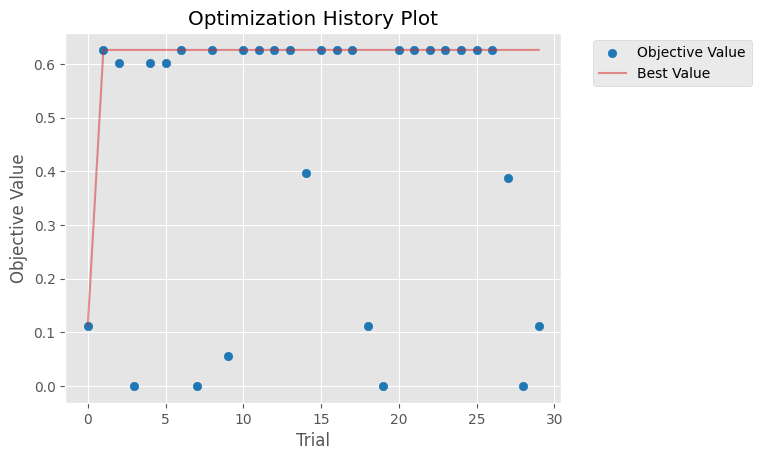

In [ ]:
# Suppress warnings and plot the optimization history
with warnings.catch_warnings():
    warnings.simplefilter("ignore", optuna.exceptions.ExperimentalWarning)
    ax = vis_matplotlib.plot_optimization_history(study_densenetsvm)

# Save the figure
fig = ax.figure
fig.savefig(os.path.join(save_path, "optuna_optimization_history_densenetsvm.png"), dpi=300, bbox_inches='tight')


In [ ]:
densenetsvm_params = study_densenetsvm.best_params
print(densenetsvm_params)

{'kernel': 'linear', 'C': 1, 'gamma': 0.1}


In [ ]:
final_params_densenetsvm = dict(kernel=densenetsvm_params['kernel'], C= densenetsvm_params['C'], gamma = densenetsvm_params['gamma'])

In [ ]:
# Combine train and val sets
X_trainval = np.concatenate([X_train_flat, X_val_flat], axis=0)
y_trainval = np.concatenate([y_train, y_val], axis=0)

# Define your final SVM with best hyperparameters
model = SVC(kernel='linear', C=1, gamma=0.1, probability=True)

start_train = perf_counter()

# Train the algorithm
model.fit(X_trainval, y_trainval)

end_train = perf_counter()
training_time = end_train - start_train
print(f"Final model training time: {training_time:.2f} s")


[codecarbon INFO @ 06:57:42] Energy consumed for RAM : 0.002533 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:57:42] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:57:42] Energy consumed for All CPU : 0.002834 kWh
[codecarbon INFO @ 06:57:42] Energy consumed for all GPUs : 0.003436 kWh. Total GPU Power : 50.077860564205494 W
[codecarbon INFO @ 06:57:42] 0.008803 kWh of electricity used since the beginning.
[codecarbon INFO @ 06:57:42] 0.009692 g.CO2eq/s mean an estimation of 305.64855392416547 kg.CO2eq/year
[codecarbon INFO @ 06:57:52] Energy consumed for RAM : 0.002639 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:57:52] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 06:57:52] Energy consumed for All CPU : 0.002952 kWh
[codecarbon INFO @ 06:57:52] Energy consumed for all GPUs : 0.003575 kWh. Total GPU Power : 50.052650204352524 W
[codecarbon INFO @ 06:57:52] 0.009166 kWh of electricity use

Final model training time: 91.72 s


[codecarbon INFO @ 06:59:13] Energy consumed for RAM : 0.003487 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 06:59:13] Delta energy consumed for CPU with constant : 0.000122 kWh, power : 42.5 W
[codecarbon INFO @ 06:59:13] Energy consumed for All CPU : 0.003900 kWh


In [ ]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, log_loss, brier_score_loss,
                             roc_auc_score, classification_report, confusion_matrix,
                             roc_curve, auc)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(y_true, y_pred, y_proba, class_names=None):
    if class_names is None:
        class_names = ['Non‑Demented', 'Demented']

    # Convert to NumPy
    y_true  = np.asarray(y_true)
    y_pred  = np.asarray(y_pred)
    y_proba = np.asarray(y_proba)
    if y_proba.ndim > 1:
        y_proba = y_proba[:, 1]

    # Compute the metrics
    accuracy      = accuracy_score(y_true, y_pred)
    balanced_acc  = balanced_accuracy_score(y_true, y_pred)
    precision     = precision_score(y_true, y_pred)
    recall        = recall_score(y_true, y_pred)
    f1            = f1_score(y_true, y_pred)
    logloss       = log_loss(y_true, y_proba)
    brier         = brier_score_loss(y_true, y_proba)
    roc_auc       = roc_auc_score(y_true, y_proba)

    # Print the results
    print(f"Accuracy:             {accuracy:.4f}")
    print(f"Balanced accuracy:    {balanced_acc:.4f}")
    print(f"Precision:            {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 score:             {f1:.4f}")
    print(f"Log loss:             {logloss:.4f}")
    print(f"Brier score:          {brier:.4f}")
    print(f"AUC‑ROC:              {roc_auc:.4f}")

    print("\nClassification report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
start_test = perf_counter()

# Predict on the test set
y_test_pred = model.predict(X_test_flat)
y_test_proba = model.predict_proba(X_test_flat)[:, 1]  # Probabilities for class 1 (Demented)

end_test = perf_counter()
inference_time = end_test - start_test
print(f"Test‑set inference time: {inference_time:.4f} s")


[codecarbon INFO @ 07:00:13] Energy consumed for RAM : 0.004120 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 07:00:13] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 07:00:13] Energy consumed for All CPU : 0.004608 kWh
[codecarbon INFO @ 07:00:13] Energy consumed for all GPUs : 0.005520 kWh. Total GPU Power : 50.088891658681646 W
[codecarbon INFO @ 07:00:13] 0.014248 kWh of electricity used since the beginning.


Test‑set inference time: 7.9168 s


In [ ]:
# Call the function and compute the metrics
test_metrics = evaluate_model(y_true=y_test, y_pred=y_test_pred, y_proba=y_test_proba, class_names=['Non-Demented', 'Demented'])

Accuracy:             0.8519
Balanced accuracy:    0.7937
Precision:            0.6842
Recall (Sensitivity): 0.6842
F1 score:             0.6842
Log loss:             0.3932
Brier score:          0.1185
AUC‑ROC:              0.8913

Classification report:
              precision    recall  f1-score   support

Non-Demented       0.90      0.90      0.90        62
    Demented       0.68      0.68      0.68        19

    accuracy                           0.85        81
   macro avg       0.79      0.79      0.79        81
weighted avg       0.85      0.85      0.85        81



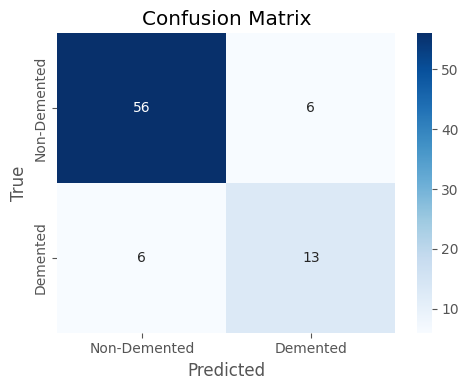

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  Confusion‑matrix plotting function
def confusion_matrix_plot(y_true, y_pred, class_names=None):
    if class_names is None:
        class_names = ['Non‑Demented', 'Demented']

    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    return fig

# Plot and save
fig = confusion_matrix_plot(y_test, y_test_pred)
fig.savefig(os.path.join(save_dir, filename), dpi=300)
plt.close(fig)


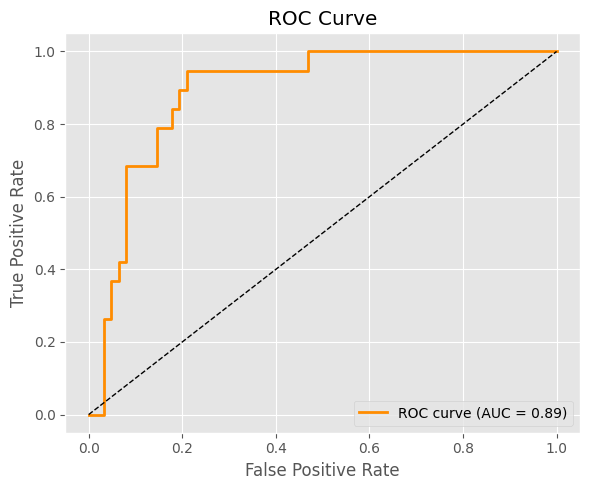

In [ ]:
from sklearn.metrics import roc_curve, auc

# Create the ROC AUC curve plot
def roc_curve_plot(y_true, y_proba):
    y_proba = np.asarray(y_proba).ravel()
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, color='darkorange', label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    return fig

# Call the function and save the figure
fig = roc_curve_plot(y_test, y_test_proba)
fig.savefig(os.path.join(save_path, "roc_curve_densenetsvm.png"), dpi=300)
plt.close(fig)

In [ ]:
tracker.stop()

[codecarbon INFO @ 07:00:51] Energy consumed for RAM : 0.004521 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 07:00:51] Delta energy consumed for CPU with constant : 0.000095 kWh, power : 42.5 W
[codecarbon INFO @ 07:00:51] Energy consumed for All CPU : 0.005057 kWh
[codecarbon INFO @ 07:00:51] Energy consumed for all GPUs : 0.006048 kWh. Total GPU Power : 49.88140336858205 W
[codecarbon INFO @ 07:00:51] 0.015626 kWh of electricity used since the beginning.


0.004181854663832485

In [ ]:
# Convert the emissions CSV to Excel and save it in the Google Drive folder
csv_path = os.path.join(output_folder, "DenseNet+SVM_emissions.csv")
excel_path = os.path.join(output_folder, "DenseNet+SVM_emissions.xlsx")

df = pd.read_csv(csv_path)
df.to_excel(excel_path, index=False)

**U-Net+Adaboost**

In [ ]:
# Import libraries
import numpy as np
import nibabel as nib
import cv2
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate, GlobalAveragePooling2D, Dense)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from nilearn.datasets import fetch_oasis_vbm
import tensorflow as tf

In [ ]:
from sklearn.metrics import (classification_report, precision_score, recall_score, f1_score, balanced_accuracy_score, brier_score_loss, log_loss, confusion_matrix)
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LeakyReLU
from time import perf_counter

In [ ]:
import random
import tensorflow as tf
import numpy as np
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
# Preprocess and standardize each MRI slice
def preprocess(df):
    X, y = [], []
    for idx in df.index:
        label = df.loc[idx, 'demented']
        img_path = dataset.gray_matter_maps[idx]

        img = nib.load(img_path)
        data = img.get_fdata()
        slice_ = data[:, :, data.shape[2] // 2]

        # Z-score normalization
        mean = np.mean(slice_)
        std = np.std(slice_)
        if std == 0: std = 1e-8                    # avoid division by zero
        slice_zscore = (slice_ - mean) / std

        # Only accept slices with expected shape
        if slice_zscore.shape == (91, 109):
            X.append(slice_zscore[..., np.newaxis])    # add channel dim
            y.append(label)

    return np.array(X), np.array(y)

# Resize standardized slices
def resize_images(X, new_shape=(256, 256)):
    resized_X = []
    for img in X:
        img_resized = cv2.resize(img.squeeze(), new_shape, interpolation=cv2.INTER_AREA)
        resized_X.append(img_resized[..., np.newaxis])
    return np.array(resized_X)

# Apply preprocessing
X, y = preprocess(metadata)
X_resized = resize_images(X)


In [ ]:
# Split the data
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resized, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

In [ ]:
# U-Net architecture was retrived from this GitHub repository https://github.com/fwrhine/ImprovedUNet.git

In [ ]:
# Initialize the Tracker
tracker = OfflineEmissionsTracker(output_dir="/content/drive/MyDrive/codecarbon_summary/", output_file="Unet+AdaBoost_emissions.csv", country_iso_code="NLD", measure_power_secs=10)
tracker.start()

[codecarbon INFO @ 07:03:15] offline tracker init
[codecarbon WARNING @ 07:03:15] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 07:03:15] [setup] RAM Tracking...
[codecarbon INFO @ 07:03:15] [setup] CPU Tracking...
[codecarbon WARNING @ 07:03:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 07:03:16] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 07:03:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 07:03:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 07:03:16] [setup] GPU Tracking...
[codecarbon INFO @ 07:03:16] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 07:03:16] The below tracking methods have been set up:
            

In [ ]:
# Build U-Net encoder (feature extractor)

def unet_encoder(input_shape=(256, 256, 1)):
    inputs = Input(shape=input_shape)

    # Contracting path
    c1 = Conv2D(16, 3, padding='same')(inputs)
    c1 = LeakyReLU(negative_slope=0.01)(c1)
    c1 = Conv2D(16, 3, padding='same')(c1)
    c1 = LeakyReLU(negative_slope=0.01)(c1)
    p1 = MaxPooling2D()(c1)

    c2 = Conv2D(32, 3, padding='same')(p1)
    c2 = LeakyReLU(negative_slope=0.01)(c2)
    c2 = Conv2D(32, 3, padding='same')(c2)
    c2 = LeakyReLU(negative_slope=0.01)(c2)
    p2 = MaxPooling2D()(c2)

    c3 = Conv2D(64, 3, padding='same')(p2)
    c3 = LeakyReLU(negative_slope=0.01)(c3)
    c3 = Conv2D(64, 3, padding='same')(c3)
    c3 = LeakyReLU(negative_slope=0.01)(c3)
    p3 = MaxPooling2D()(c3)

    c4 = Conv2D(128, 3, padding='same')(p3)
    c4 = LeakyReLU(negative_slope=0.01)(c4)
    c4 = Conv2D(128, 3, padding='same')(c4)
    c4 = LeakyReLU(negative_slope=0.01)(c4)

    gap = GlobalAveragePooling2D()(c4)
    output = Dense(1, activation='sigmoid')(gap)

    model = Model(inputs, output)
    feature_extractor = Model(inputs=inputs, outputs=c4)  # output features

    return model, feature_extractor

# Call the function
input_shape = (256, 256, 1)
model, feature_extractor = unet_encoder(input_shape)

# Show summary
model.summary()

Model: "functional_453"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_152 (InputLayer)    │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_304 (Conv2D)             │ (None, 256, 256, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_305 (Conv2D)             │ (None, 256, 256, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_304               │ (None, 128, 128, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_306 (Conv2D)             │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_307 (Conv2D)             │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_305               │ (None, 64, 64, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_308 (Conv2D)             │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_309 (Conv2D)             │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_306               │ (None, 32, 32, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_310 (Conv2D)             │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_311 (Conv2D)             │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 293,361 (1.12 MB)

 Trainable params: 293,361 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils import class_weight
from tensorflow.keras.regularizers import l2
from time import perf_counter

start_tune = perf_counter()

# Define the Optuna objective function for U-Net
def objective_unet(trial):
    learning_rate = trial.suggest_categorical("learning_rate", [1e-4, 5e-4, 1e-3])
    weight_decay  = trial.suggest_categorical("weight_decay", [1e-6, 1e-5, 1e-4])
    dropout_rate  = trial.suggest_categorical("dropout_rate", [0.0, 0.2, 0.4])
    # Build U-Net encoder
    inputs = Input(shape=(256, 256, 1))

    # Block 1 : 16 filters
    x = Conv2D(16, 3, padding='same', kernel_regularizer=l2(weight_decay))(inputs)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(16, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    x = MaxPooling2D()(x)

    # Block 2 : 32 filters
    x = Conv2D(32, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(32, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    x = MaxPooling2D()(x)

    # Block 3 : 64 filters
    x = Conv2D(64, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(64, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    x = MaxPooling2D()(x)

    # Block 4 : 128 filters
    x = Conv2D(128, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(128, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)

    x = GlobalAveragePooling2D()(x)
    if dropout_rate > 0:
        x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Balanced class-weights
    cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    cw_dict = dict(enumerate(cw))

    # Train for a few epochs
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, class_weight=cw_dict, verbose=0)

    # tf.function wrapper to avoid retracing warning
    @tf.function(reduce_retracing=True)
    def _fast_predict(batch):
        return model(batch, training=False)

    # F1 on validation split
    y_val_pred = (_fast_predict(X_val).numpy() > 0.5).astype(int)
    return f1_score(y_val, y_val_pred)


In [ ]:
# Run the optimization
study_unet = optuna.create_study(direction="maximize")
study_unet.optimize(objective_unet, n_trials=30)

print("Best U-Net hyperparameters:", study_unet.best_params)

[codecarbon INFO @ 07:04:16] Energy consumed for RAM : 0.000633 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 07:04:16] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 07:04:16] Energy consumed for All CPU : 0.000708 kWh
[codecarbon INFO @ 07:04:16] Energy consumed for all GPUs : 0.000865 kWh. Total GPU Power : 61.676839483533314 W
[codecarbon INFO @ 07:04:16] 0.002206 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:04:26] Energy consumed for RAM : 0.000739 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 07:04:26] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 07:04:26] Energy consumed for All CPU : 0.000826 kWh
[codecarbon INFO @ 07:04:26] Energy consumed for all GPUs : 0.001132 kWh. Total GPU Power : 96.22616935317401 W
[codecarbon INFO @ 07:04:26] 0.002697 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:04:36] Energy consumed for RAM : 0.000844 kWh. RAM Power : 

Best U-Net hyperparameters: {'learning_rate': 0.0001, 'weight_decay': 1e-06, 'dropout_rate': 0.2}


In [ ]:
# Get the best hyperparameters from Optuna
best_lr          = study_unet.best_params['learning_rate']
best_dropout     = study_unet.best_params['dropout_rate']
best_weight_decay = study_unet.best_params['weight_decay']

# Rebuild U-Net encoder model using best hyperparams
def build_final_unet(input_shape=(256, 256, 1), dropout_rate=0.2, weight_decay=1e-5):
    inputs = Input(shape=input_shape)
    # Block 1
    x = Conv2D(16, 3, padding='same', kernel_regularizer=l2(weight_decay))(inputs)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(16, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    p1 = MaxPooling2D()(x)

    # Block 2
    x = Conv2D(32, 3, padding='same', kernel_regularizer=l2(weight_decay))(p1)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(32, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    p2 = MaxPooling2D()(x)

    # Block 3
    x = Conv2D(64, 3, padding='same', kernel_regularizer=l2(weight_decay))(p2)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(64, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)
    p3 = MaxPooling2D()(x)

    # Block 4
    x = Conv2D(128, 3, padding='same', kernel_regularizer=l2(weight_decay))(p3)
    x = LeakyReLU(0.01)(x)
    x = Conv2D(128, 3, padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = LeakyReLU(0.01)(x)

    # Global pooling
    gap = GlobalAveragePooling2D()(x)
    if dropout_rate > 0:
        gap = Dropout(dropout_rate)(gap)
    outputs = Dense(1, activation='sigmoid')(gap)
    model = Model(inputs, outputs)
    feature_extractor = Model(inputs, x)
    return model, feature_extractor

# Compute class weights
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_trainval), y=y_trainval)
cw_dict = dict(enumerate(cw))

In [ ]:
# Build and train final model
model, feature_extractor = build_final_unet(input_shape=(256, 256, 1), dropout_rate=best_dropout, weight_decay=best_weight_decay)

model.compile(optimizer=Adam(learning_rate=best_lr), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_trainval, y_trainval, epochs=30, batch_size=32, class_weight=cw_dict,verbose=0)

# Extract features from encoder
features_trainval = feature_extractor.predict(X_trainval, batch_size=32, verbose=0)
X_trainval_flat = features_trainval.reshape(features_trainval.shape[0], -1)



[codecarbon INFO @ 07:12:26] Energy consumed for RAM : 0.005802 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 07:12:26] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 07:12:26] Energy consumed for All CPU : 0.006490 kWh
[codecarbon INFO @ 07:12:26] Energy consumed for all GPUs : 0.011627 kWh. Total GPU Power : 49.30090967704042 W
[codecarbon INFO @ 07:12:26] 0.023919 kWh of electricity used since the beginning.


In [ ]:
# Extract encoder features
# Extract deep feature representations from the encoder for full train+val and test sets
features_trainval = feature_extractor.predict(X_trainval, batch_size=32, verbose=0)
features_test     = feature_extractor.predict(X_test,     batch_size=32, verbose=0)

# Flatten feature maps for use in AdaBoost
X_trainval_flat = features_trainval.reshape(features_trainval.shape[0], -1)
X_test_flat     = features_test.reshape(features_test.shape[0],     -1)

# Split flattened trainval set into train and val for AdaBoost hyperparameter tuning
from sklearn.model_selection import train_test_split

X_train_flat, X_val_flat, y_train_flat, y_val_flat = train_test_split(X_trainval_flat, y_trainval, test_size=0.2, random_state=42,stratify=y_trainval)


In [ ]:
# AdaBoost hyperparameter tuning
# Cross-validation setup
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective_adaboost(trial):
    # AdaBoost hyperparameters
    n_estimators  = trial.suggest_categorical('n_estimators',  [50, 200, 300])
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1])

    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    clf.fit(X_train_flat, y_train_flat)
    y_val_pred = clf.predict(X_val_flat)
    return f1_score(y_val_flat, y_val_pred)


In [ ]:
# Run Optuna optimization
study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(objective_adaboost, n_trials=30, show_progress_bar=False)

# Timing and results summary
end_tune = perf_counter()
tuning_time = end_tune - start_tune
print(f"Hyperparameter‑tuning time: {tuning_time:.2f} s")

best_ada_params = study_ada.best_params
print("Best AdaBoost params:", best_ada_params)


Streaming output truncated to the last 5000 lines.
[codecarbon INFO @ 09:28:08] Energy consumed for All CPU : 0.102563 kWh
[codecarbon INFO @ 09:28:08] Energy consumed for all GPUs : 0.123771 kWh. Total GPU Power : 49.3163190547807 W
[codecarbon INFO @ 09:28:08] 0.318026 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:28:18] Energy consumed for RAM : 0.091798 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 09:28:18] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 09:28:18] Energy consumed for All CPU : 0.102681 kWh
[codecarbon INFO @ 09:28:18] Energy consumed for all GPUs : 0.123909 kWh. Total GPU Power : 49.800821967978635 W
[codecarbon INFO @ 09:28:18] 0.318388 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:28:28] Energy consumed for RAM : 0.091903 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 09:28:28] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 09:28:28] En

Hyperparameter‑tuning time: 18396.39 s
Best AdaBoost params: {'n_estimators': 300, 'learning_rate': 0.1}


In [ ]:
# Retrain Adaboost on the combined trainval set
start_train = perf_counter()

final_ada = AdaBoostClassifier(**best_ada_params, random_state=42)
final_ada.fit(X_trainval_flat, y_trainval)

end_train = perf_counter()
training_time = end_train - start_train
print(f"Final model training time: {training_time:.2f} s")


[codecarbon INFO @ 12:16:28] Energy consumed for RAM : 0.198248 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 12:16:28] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 12:16:28] Energy consumed for All CPU : 0.221752 kWh
[codecarbon INFO @ 12:16:28] Energy consumed for all GPUs : 0.262952 kWh. Total GPU Power : 49.8084918772264 W
[codecarbon INFO @ 12:16:28] 0.682953 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:16:38] Energy consumed for RAM : 0.198354 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 12:16:38] Delta energy consumed for CPU with constant : 0.000118 kWh, power : 42.5 W
[codecarbon INFO @ 12:16:38] Energy consumed for All CPU : 0.221870 kWh
[codecarbon INFO @ 12:16:38] Energy consumed for all GPUs : 0.263089 kWh. Total GPU Power : 49.28456773633797 W
[codecarbon INFO @ 12:16:38] 0.683313 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:16:38] 0.009664 g.CO2eq/s mean an estimation of 304.749630215

Final model training time: 975.73 s


In [ ]:

def evaluate_model(y_true, y_pred, y_proba, class_names=None):
    if class_names is None:
        class_names = ['Non‑Demented', 'Demented']

    # Convert to NumPy
    y_true  = np.asarray(y_true)
    y_pred  = np.asarray(y_pred)
    y_proba = np.asarray(y_proba)
    if y_proba.ndim > 1:
        y_proba = y_proba[:, 1]

    # Compute the metrics
    accuracy      = accuracy_score(y_true, y_pred)
    balanced_acc  = balanced_accuracy_score(y_true, y_pred)
    precision     = precision_score(y_true, y_pred, zero_division=0)
    recall        = recall_score(y_true, y_pred, zero_division=0)
    f1            = f1_score(y_true, y_pred, zero_division=0)
    logloss       = log_loss(y_true, y_proba)
    brier         = brier_score_loss(y_true, y_proba)
    roc_auc       = roc_auc_score(y_true, y_proba)

    # Print the results
    print(f"Accuracy:             {accuracy:.4f}")
    print(f"Balanced accuracy:    {balanced_acc:.4f}")
    print(f"Precision:            {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 score:             {f1:.4f}")
    print(f"Log loss:             {logloss:.4f}")
    print(f"Brier score:          {brier:.4f}")
    print(f"AUC‑ROC:              {roc_auc:.4f}")

    print("\nClassification report:")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

In [ ]:
# Make predictions and obtain probabilities and predictions

start_test = perf_counter()

y_test_proba = final_ada.predict_proba(X_test_flat)[:, 1]
y_test_pred  = (y_test_proba >= 0.5).astype(int)

end_test = perf_counter()
inference_time = end_test - start_test
print(f"Test-set inference time: {inference_time:.4f} s")


Test-set inference time: 0.5821 s


In [ ]:
# Evaluate the performance by computing the test metrics
test_metrics = evaluate_model(y_true=y_test, y_pred=y_test_pred, y_proba=y_test_proba, class_names=['Non-Demented', 'Demented'])


Accuracy:             0.4783
Balanced accuracy:    0.4635
Precision:            0.3889
Recall (Sensitivity): 0.3500
F1 score:             0.3684
Log loss:             0.6990
Brier score:          0.2531
AUC‑ROC:              0.5058

Classification report:
              precision    recall  f1-score   support

Non-Demented       0.54      0.58      0.56        26
    Demented       0.39      0.35      0.37        20

    accuracy                           0.48        46
   macro avg       0.46      0.46      0.46        46
weighted avg       0.47      0.48      0.47        46



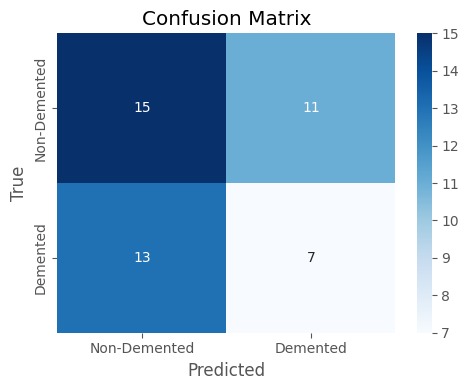

In [ ]:
filename = "matrix_unetadaboost.png"
os.makedirs(save_dir, exist_ok=True)

# Confusion matrix plotting
def confusion_matrix_plot(y_true, y_pred, class_names=None):
    if class_names is None:
        class_names = ['Non-Demented', 'Demented']

    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    return fig

# Plot and save
fig = confusion_matrix_plot(y_test, y_test_pred)
fig.savefig(os.path.join(save_dir, filename), dpi=300)
plt.close(fig)


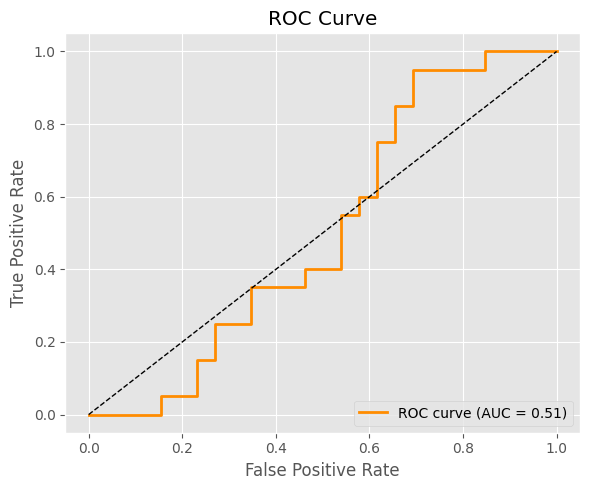

In [ ]:
# ROC-AUC plotting helper
def roc_curve_plot(y_true, y_proba):
    y_proba = np.asarray(y_proba).ravel()
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    fig = plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, color='darkorange', label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    return fig

# Call the function and save the plot
roc_filename = "roc_curve_unetadaboost.png"
fig = roc_curve_plot(y_test, y_test_proba)
fig.savefig(os.path.join(save_dir, roc_filename), dpi=300)
plt.close(fig)


In [ ]:
tracker.stop()

[codecarbon INFO @ 12:38:21] Energy consumed for RAM : 0.212094 kWh. RAM Power : 38.0 W
[codecarbon INFO @ 12:38:21] Delta energy consumed for CPU with constant : 0.000028 kWh, power : 42.5 W
[codecarbon INFO @ 12:38:21] Energy consumed for All CPU : 0.237239 kWh
[codecarbon INFO @ 12:38:21] Energy consumed for all GPUs : 0.281012 kWh. Total GPU Power : 48.87392718993173 W
[codecarbon INFO @ 12:38:21] 0.730345 kWh of electricity used since the beginning.


0.19545648289865375

In [ ]:
# Convert the emissions CSV to Excel and save it in the folder
csv_path = os.path.join(output_folder, "Unet+AdaBoost_emissions.csv")
excel_path = os.path.join(output_folder, "Unet+AdaBoost_emissions.xlsx")

df = pd.read_csv(csv_path)
df.to_excel(excel_path, index=False)